## **[:+:] -- Registration & Alignment for Neuroimagery -- [:+:]** 

In [ ]:
from pystackreg import StackReg
from skimage import io
from skimage import registration
from skimage.transform import warp
# from skimage import register_translation
# from skimage.feature.register_translation import _upsampled_dft
# from scipy.ndimage import fourier_shift
# import scipy.io 
# import imageio 
# import sys
# import matplotlib.animation as animation
from matplotlib import pyplot as plt
import glob
import tifffile as tif
import numpy as np
from scipy.io import loadmat
import mat73
from scipy.ndimage import shift
import os 
import image_registration as imreg
import seaborn as sb
import pandas as pd
import re
# print(sys.path)
# import cv2
# import sys
# print(sys.path)

norm_Path= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized")
mat_Path = (r'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_files') 
tiff_Path = (r'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_files') 
sample_Path= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample")
matrix_Path= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_matrices")
reg_Path= (r'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered')

refMat56_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.mat")
refMat68_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgamma.mat")
refMat97_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse97_MKNS.mat")
tiffFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.tiff")
subStackPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks")
subStackPath1= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\p1")
superStackPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks")
diceCsv_File= r"C:\Users\richa\OneDrive\Neuroscience\Code\Repo\diceMatrix.csv"
diceFrame= pd.read_csv(diceCsv_File)

unreg_x9840= io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\unaligned180_300_refPrefix.tiff")[:, :, 120:]
# unreg56_x9840= io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\unaligned180_300_refPrefix.tiff")[:, :, 120:]
# unreg68_x9840= io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\unaligned_ref68_prefix.tiff")[:, :, 120:]
# unreg97_x9840= io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\unaligned_ref97_prefix.tiff")[:, :, 120:]
#[-]--------------------------------------------------------\
mean_unreg= np.mean(unreg_x9840)
std_unreg= np.std(unreg_x9840)
max_unreg= np.amax(unreg_x9840)
tif.imsave(matrix_Path + '\mean_unreg.tiff', mean_unreg) 
tif.imsave(matrix_Path + '\std_unreg.tiff', std_unreg) 
tif.imsave(matrix_Path + '\max_unreg.tiff', max_unreg) 
#----------------------------------------------------------/

std_unreg= io.imread(matrix_Path + '\std_unreg68.tiff', std_unreg) 
max_unreg= io.imread(matrix_Path + '\max_unreg68.tiff', max_unreg) 
# broken file, fix later: mean_unreg56=          io.imread(matrix_Path + '\mean_unreg56.tiff') 
irtfSim_avg56_RB= (io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref56x180_300.tiff"))
irtfSim_avg68_RB= np.transpose(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref68x180_300.tiff"), (1,2,0))
irtfSim_avg97_RB= np.transpose(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref97x180_300.tiff"), (1,2,0))
psr_avg56_RB= io.imread(reg_Path+"\psr_avg_m56_RB.tiff")
psr_avg68_RB= io.imread(reg_Path+"\psr_avg_m68_RB.tiff")
psr_avg97_RB= io.imread(reg_Path+"\psr_avg_m97_RB.tiff")
psr_avg56_AF= io.imread(reg_Path+"\psr_avg_m56_AF.tiff")
psr_avg68_AF= io.imread(reg_Path+"\psr_avg_m68_AF.tiff")
psr_avg97_AF= io.imread(reg_Path+"\psr_avg_m97_AF.tiff")
psr_avg56_SR= io.imread(reg_Path+"\psr_avg_m56_SR.tiff")
psr_avg68_SR= io.imread(reg_Path+"\psr_avg_m68_SR.tiff")
psr_avg97_SR= io.imread(reg_Path+"\psr_avg_m97_SR.tiff")
psr_avg56_BL= io.imread(reg_Path+"\psr_avg_m56_BL.tiff")
psr_avg68_BL= io.imread(reg_Path+"\psr_avg_m68_BL.tiff")
psr_avg97_BL= io.imread(reg_Path+"\psr_avg_m97_BL.tiff")
deform_avg56= io.imread(reg_Path+"\Afterregis_181300_deform_ref56x180_300.tiff")
deform_avg68= np.transpose(io.imread(reg_Path+"\Afterregis_181300_deform_ref68x180_300.tiff"), (1,2,0))
deform_avg97= np.transpose(io.imread(reg_Path+"\Afterregis_181300_deform_ref97x180_300.tiff"), (1,2,0))
opFlow_ilk_avg56 = io.imread(reg_Path + "\opFlow_ilk_ref56.tiff")[ :, :, 1:9841]
opFlow_ilk_avg68 = io.imread(reg_Path + "\opFlow_ilk_ref68.tiff")[ :, :, 1:9841]
opFlow_ilk_avg97 = io.imread(reg_Path + "\opFlow_ilk_ref97.tiff")[ :, :, 1:9841]
opFlow_tvl1_avg56 = io.imread(reg_Path + "\opFlow_tvl1_ref56.tiff")
opFlow_tvl1_avg68 = io.imread(reg_Path + "\opFlow_tvl1_ref68.tiff")
opFlow_tvl1_avg97 = io.imread(reg_Path + "\opFlow_tvl1_ref97.tiff")
irtfSim_avg56_RB= io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref56x180_300.tiff")
irtfSim_avg68_RB= io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref68x180_300.tiff")
irtfSim_avg97_RB= io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref97x180_300.tiff")
opForm_ilk_avg56 = io.imread(reg_Path + "\opForm_ilk_ref56.tiff")
opForm_ilk_avg68 = io.imread(reg_Path + "\opForm_ilk_ref68.tiff")
opForm_ilk_avg97 = io.imread(reg_Path + "\opForm_ilk_ref97.tiff")
opForm_tvl1_avg56 = io.imread(reg_Path + "\opForm_tvl1_ref56.tiff")
opForm_tvl1_avg68 = io.imread(reg_Path + "\opForm_tvl1_ref68.tiff")
opForm_tvl1_avg97 = io.imread(reg_Path + "\opForm_tvl1_ref97.tiff")
mean_unreg_x9840=            io.imread(matrix_Path + '\mean_unreg.tiff') 
# mean_unreg56=            io.imread(matrix_Path + '\mean_unreg56.tiff') 
# mean_unreg68=          io.imread(matrix_Path + '\mean_unreg68.tiff') 
# mean_unreg97=          io.imread(matrix_Path + '\mean_unreg97.tiff') 
mean_ref56=        io.imread(matrix_Path + '\mean_ref56.tiff') 
mean_ref68=        io.imread(matrix_Path + '\mean_ref68.tiff') 
mean_ref97=        io.imread(matrix_Path + '\mean_ref97.tiff') 
mean_psr_avg56_RB=          io.imread(matrix_Path + '\mean_psr_avg56_RB.tiff') 
mean_psr_avg56_AF=          io.imread(matrix_Path + '\mean_psr_avg56_AF.tiff') 
mean_psr_avg56_SR=          io.imread(matrix_Path + '\mean_psr_avg56_SR.tiff') 
mean_psr_avg56_BL=          io.imread(matrix_Path + '\mean_psr_avg56_BL.tiff') 
mean_psr_avg68_RB=          io.imread(matrix_Path + '\mean_psr_avg68_RB.tiff') 
mean_psr_avg68_AF=          io.imread(matrix_Path + '\mean_psr_avg68_AF.tiff') 
mean_psr_avg68_SR=          io.imread(matrix_Path + '\mean_psr_avg68_SR.tiff') 
mean_psr_avg68_BL=          io.imread(matrix_Path + '\mean_psr_avg68_BL.tiff') 
mean_psr_avg97_RB=          io.imread(matrix_Path + '\mean_psr_avg97_RB.tiff') 
mean_psr_avg97_AF=          io.imread(matrix_Path + '\mean_psr_avg97_AF.tiff') 
mean_psr_avg97_SR=          io.imread(matrix_Path + '\mean_psr_avg97_SR.tiff') 
mean_psr_avg97_BL=          io.imread(matrix_Path + '\mean_psr_avg97_BL.tiff') 
mean_deform_avg56=       io.imread(matrix_Path + '\mean_deform_avg56.tiff') 
mean_deform_avg68=       io.imread(matrix_Path + '\mean_deform_avg68.tiff') 
mean_deform_avg97=       io.imread(matrix_Path + '\mean_deform_avg97.tiff') 
mean_opFlow_ilk_avg56=   io.imread(matrix_Path + '\mean_opFlow_ilk_avg56.tiff') 
mean_opFlow_ilk_avg68=   io.imread(matrix_Path + '\mean_opFlow_ilk_avg68.tiff') 
mean_opFlow_ilk_avg97=   io.imread(matrix_Path + '\mean_opFlow_ilk_avg97.tiff') 
mean_opFlow_tvl1_avg56=  io.imread(matrix_Path + '\mean_opFlow_tvl1_avg56.tiff') 
mean_opFlow_tvl1_avg68=  io.imread(matrix_Path + '\mean_opFlow_tvl1_avg68.tiff') 
mean_opFlow_tvl1_avg97=  io.imread(matrix_Path + '\mean_opFlow_tvl1_avg97.tiff') 
mean_opForm_ilk_avg56=   io.imread(matrix_Path + '\mean_opForm_ilk_avg56.tiff') 
mean_opForm_ilk_avg68=   io.imread(matrix_Path + '\mean_opForm_ilk_avg68.tiff') 
mean_opForm_ilk_avg97=   io.imread(matrix_Path + '\mean_opForm_ilk_avg97.tiff') 
mean_opForm_tvl1_avg56=  io.imread(matrix_Path + '\mean_opForm_tvl1_avg56.tiff') 
mean_opForm_tvl1_avg68=  io.imread(matrix_Path + '\mean_opForm_tvl1_avg68.tiff') 
mean_opForm_tvl1_avg97=  io.imread(matrix_Path + '\mean_opForm_tvl1_avg97.tiff') 
mean_irtfSim_avg56_RB=      io.imread(matrix_Path + '\mean_irtfSim_avg56_RB.tiff') 
mean_irtfSim_avg68_RB=      io.imread(matrix_Path + '\mean_irtfSim_avg68_RB.tiff') 
mean_irtfSim_avg97_RB=      io.imread(matrix_Path + '\mean_irtfSim_avg97_RB.tiff') 
max_unreg_x9840=         io.imread(matrix_Path + '\max_unreg.tiff') 
# max_unreg56=         io.imread(matrix_Path + '\max_unreg56.tiff') 
# max_unreg68=         io.imread(matrix_Path + '\max_unreg68.tiff') 
# max_unreg97=         io.imread(matrix_Path + '\max_unreg97.tiff') 
max_mean_ref56=       io.imread(matrix_Path + '\max_mean_ref56 .tiff') 
max_mean_ref68=       io.imread(matrix_Path + '\max_mean_ref68 .tiff')                                                              
max_mean_ref97=       io.imread(matrix_Path + '\max_mean_ref97 .tiff') 
max_psr_avg56_RB=         io.imread(matrix_Path + '\max_psr_avg56_RB.tiff') 
max_psr_avg56_AF=         io.imread(matrix_Path + '\max_psr_avg56_AF.tiff') 
max_psr_avg56_SR=         io.imread(matrix_Path + '\max_psr_avg56_SR.tiff') 
max_psr_avg56_BL=         io.imread(matrix_Path + '\max_psr_avg56_BL.tiff') 
max_psr_avg68_RB=         io.imread(matrix_Path + '\max_psr_avg68_RB.tiff') 
max_psr_avg68_AF=         io.imread(matrix_Path + '\max_psr_avg68_AF.tiff') 
max_psr_avg68_SR=         io.imread(matrix_Path + '\max_psr_avg68_SR.tiff') 
max_psr_avg68_BL=        io.imread(matrix_Path + '\max_psr_avg68_BL.tiff') 
max_psr_avg97_RB=      io.imread(matrix_Path + '\max_psr_avg97_RB.tiff') 
max_psr_avg97_AF=      io.imread(matrix_Path + '\max_psr_avg97_AF.tiff') 
max_psr_avg97_SR=      io.imread(matrix_Path + '\max_psr_avg97_SR.tiff') 
max_psr_avg97_BL97=      io.imread(matrix_Path + '\max_psr_avg97_BL.tiff') 
max_deform_avg56=      io.imread(matrix_Path + '\max_deform_avg56.tiff') 
max_deform_avg68=      io.imread(matrix_Path + '\max_deform_avg68.tiff') 
max_deform_avg97=      io.imread(matrix_Path + '\max_deform_avg97.tiff') 
max_opFlow_ilk_avg56=  io.imread(matrix_Path + '\max_opFlow_ilk_avg56.tiff') 
max_opFlow_ilk_avg68=  io.imread(matrix_Path + '\max_opFlow_ilk_avg68.tiff') 
max_opFlow_ilk_avg97=  io.imread(matrix_Path + '\max_opFlow_ilk_avg97.tiff') 
max_opFlow_tvl1_avg56=  io.imread(matrix_Path + '\max_opFlow_tvl1_avg56.tiff') 
max_opFlow_tvl1_avg68=  io.imread(matrix_Path + '\max_opFlow_tvl1_avg68.tiff') 
max_opFlow_tvl1_avg97=  io.imread(matrix_Path + '\max_opFlow_tvl1_avg97.tiff') 
max_opForm_ilk_avg56=  io.imread(matrix_Path + '\max_opForm_ilk_avg56.tiff') 
max_opForm_ilk_avg68=  io.imread(matrix_Path + '\max_opForm_ilk_avg68.tiff') 
max_opForm_ilk_avg97=  io.imread(matrix_Path + '\max_opForm_ilk_avg97.tiff') 
max_opForm_tvl1_avg56= io.imread(matrix_Path + '\max_opForm_tvl1_avg56.tiff') 
max_opForm_tvl1_avg68= io.imread(matrix_Path + '\max_opForm_tvl1_avg68.tiff') 
max_opForm_tvl1_avg97= io.imread(matrix_Path + '\max_opForm_tvl1_avg97.tiff') 
max_irtfSim_avg56_RB=     io.imread(matrix_Path + '\max_irtfSim_avg56_RB.tiff') 
max_irtfSim_avg68_RB=     io.imread(matrix_Path + '\max_irtfSim_avg68_RB.tiff') 
max_irtfSim_avg97_RB=     io.imread(matrix_Path + '\max_irtfSim_avg97_RB.tiff') 
std_unreg_x9840=           io.imread(matrix_Path + '\std_unreg.tiff') 
# std_unreg56=           io.imread(matrix_Path + '\std_unreg56.tiff') 
# std_unreg68=           io.imread(matrix_Path + '\std_unreg68.tiff') 
# std_unreg97=           io.imread(matrix_Path + '\std_unreg97.tiff') 
std_mean_ref56=       io.imread(matrix_Path + '\std_mean_ref56 .tiff') 
std_mean_ref68=       io.imread(matrix_Path + '\std_mean_ref68 .tiff') 
std_mean_ref97=       io.imread(matrix_Path + '\std_mean_ref97 .tiff') 
std_psr_avg56_RB=         io.imread(matrix_Path + '\std_psr_avg56_RB.tiff')
std_psr_avg56_AF=         io.imread(matrix_Path + '\std_psr_avg56_AF.tiff')
std_psr_avg56_SR=         io.imread(matrix_Path + '\std_psr_avg56_SR.tiff')
std_psr_avg56_BL=         io.imread(matrix_Path + '\std_psr_avg56_BL.tiff')
std_psr_avg68_RB=         io.imread(matrix_Path + '\std_psr_avg68_RB.tiff')
std_psr_avg68_AF=         io.imread(matrix_Path + '\std_psr_avg68_AF.tiff')
std_psr_avg68_SR=         io.imread(matrix_Path + '\std_psr_avg68_SR.tiff')
std_psr_avg68_BL=         io.imread(matrix_Path + '\std_psr_avg68_BL.tiff')
std_psr_avg97_RB=         io.imread(matrix_Path + '\std_psr_avg97_RB.tiff')
std_psr_avg97_AF=         io.imread(matrix_Path + '\std_psr_avg97_AF.tiff')
std_psr_avg97_SR=         io.imread(matrix_Path + '\std_psr_avg97_SR.tiff')
std_psr_avg97_BL=         io.imread(matrix_Path + '\std_psr_avg97_BL.tiff')
std_deform_avg56=      io.imread(matrix_Path + '\std_deform_avg56.tiff')
std_deform_avg68=      io.imread(matrix_Path + '\std_deform_avg68.tiff')
std_deform_avg97=      io.imread(matrix_Path + '\std_deform_avg97.tiff')
std_opFlow_ilk_avg56=  io.imread(matrix_Path + '\std_opFlow_ilk_avg56.tiff') 
std_opFlow_ilk_avg68=  io.imread(matrix_Path + '\std_opFlow_ilk_avg68.tiff') 
std_opFlow_ilk_avg97=  io.imread(matrix_Path + '\std_opFlow_ilk_avg97.tiff') 
std_opFlow_tvl1_avg56= io.imread(matrix_Path + '\std_opFlow_tvl1_avg56.tiff') 
std_opFlow_tvl1_avg68= io.imread(matrix_Path + '\std_opFlow_tvl1_avg68.tiff') 
std_opFlow_tvl1_avg97= io.imread(matrix_Path + '\std_opFlow_tvl1_avg97.tiff') 
std_opForm_ilk_avg56=  io.imread(matrix_Path + '\std_opForm_ilk_avg56.tiff') 
std_opForm_ilk_avg68=  io.imread(matrix_Path + '\std_opForm_ilk_avg68.tiff') 
std_opForm_ilk_avg97=  io.imread(matrix_Path + '\std_opForm_ilk_avg97.tiff') 
std_opForm_tvl1_avg56= io.imread(matrix_Path + '\std_opForm_tvl1_avg56.tiff') 
std_opForm_tvl1_avg68= io.imread(matrix_Path + '\std_opForm_tvl1_avg68.tiff') 
std_opForm_tvl1_avg97= io.imread(matrix_Path + '\std_opForm_tvl1_avg97.tiff') 
std_irtfSim_avg56_RB=     io.imread(matrix_Path + '\std_irtfSim_avg56_RB.tiff') 
std_irtfSim_avg68_RB=     io.imread(matrix_Path + '\std_irtfSim_avg68_RB.tiff') 
std_irtfSim_avg97_RB=     io.imread(matrix_Path + '\std_irtfSim_avg97_RB.tiff') 
# dft_avg56= io.imread(reg_Path+ "\dft_avgTensor.tiff")
vLen9840= unreg_x9840.shape[2]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\richa\\OneDrive\\Neuroscience\\Data\\DBS_preprocessed_ROI_and_3D_data\\normalized\\TIFF_matrices\\mean_unreg56.tiff'

## __[+]__ Functions

In [32]:
sb.set_theme(style="dark", palette=None)
plt.style.use("dark_background")

def displayHeatmap(imgMatrix, sizer= 0.6, title= "Heatmap"):
    print("// -- Shape: " + str(imgMatrix.shape)+ "-- Mean: "+ str(np.mean(imgMatrix)) +"--[::]")
    plt.figure(figsize = (15*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
    plt.title(title)
    sb.heatmap(data= imgMatrix.T, xticklabels=False, yticklabels=False )
    plt.show()

def tensorize(filename, beginDex=0, display= False):
    if display: print("Path: " + str(filename))
    if os.path.isfile(filename):
        baseName = os.path.basename(filename)
        if baseName.endswith('.mat') or os.path.splitext(filename)[1] == ".mat": 
            if display: print("\n[::] --- Fields of the MAT file: --- " + str(filename))
            filename= loadmat(filename)
            for key in filename.keys():
                if display: print(key+ " : " + str(type(filename[key])))
                if isinstance(filename[key], np.ndarray):
                    vTensor = filename[key]
                    if display: 
                        print("    --->" + str(filename[key].shape))
                        if len(vTensor.shape)>2:
                            print((vTensor[0][0][0+beginDex]))
                            print((vTensor[1][1][1+beginDex]))
                            print((vTensor[2][2][2+beginDex]))
                    else: return vTensor
        elif baseName.endswith('.tiff') or os.path.splitext(filename)[1] == ".tiff":
            vTensor= io.imread(filename)
            if display:
                shape= vTensor.shape
                print("\n[::] --- Type and dimensions of TIFF File: --- " + str(filename))
                print(type(vTensor))
                print("Shape: " + str(shape))
                if len(shape)>2 :
                    print("Elements of type: " + str(type(filename[0][0][0])))
                    print((vTensor[0][0][0]))
                    print((vTensor[1][1][1]))
                    print((vTensor[2][2][2]))
                else: 
                    print("Elements of type: " + str(type(filename[0][0])))
                    print((vTensor[0][0]))
                    print((vTensor[1][1]))
                    print((vTensor[2][2]))
        else: print("\nInvalid File type, no tensorInfo")
    elif isinstance(filename, np.ndarray):
        print("\n[::] --- Type and dimensions of Tensor: --- " )
        shape= filename.shape
        print("Shape: " + str(shape))
        if len(shape)==3 :
            print("Elements of type: " + str(type(filename[0][0][0])))
            print((filename[0][0][0]))
            print((filename[1][1][1]))
            print((filename[2][2][2]))
        else: 
            print("Elements of type: " + str(type(filename[0][0])))
            print((filename[0][0]))
            print((filename[1][1]))
            print((filename[2][2]))
    else: print("\nNo tensorInfo, Invalid Input")

def mattotiff(matFile, outPath, beginDex=0, enDex=3600, showTensorInfo=False, addendum=""):
    # matData= loadmat(matFile)
    vTensor= tensorize(matFile)[:, :, beginDex:enDex]

    # [+]- Save 3d tensor as a tiff image stack, saves into current directory by default
    matBaseName = os.path.basename(matFile)
    tiffName = os.path.splitext(matBaseName)[0] + addendum+".tiff"
    output_filename = os.path.join(outPath, tiffName)
    tif.imsave(output_filename, vTensor, bigtiff=True)
    #[+]- Access the new  TIFF file, and makes sure its dimensions are proper
    if showTensorInfo:
        print("In: " + matFile)
        print("    " + matBaseName + "---> "+tiffName)
        print("Out: " + tiffName)
        print("Path: : " + output_filename)
    return output_filename

def mat73totiff(matFile, outPath, beginDex=0, enDex=3600, showTensorInfo=False, addendum=""):
    matData= mat73.loadmat(matFile)
    for key in matData.keys():
        print("keys: " + str(key) + ": " + str(type(key)))
        if isinstance(matData[key], list):
            vTensor= np.asarray(matData[key])
            print("    ---> vTensor: " + str(vTensor.shape))

    rotTensor= np.empty((vTensor.shape[1],vTensor.shape[2],vTensor.shape[0]))
    for i in range(vTensor.shape[0]):
        slice = vTensor[i, :, :, ]
        slice= np.reshape(slice, (slice.shape[0], slice.shape[1], 1) )
        rotTensor= np.concatenate((rotTensor,slice ), axis=2)
    matBaseName = os.path.basename(matFile)
    tiffName = os.path.splitext(matBaseName)[0] + addendum+".tiff"
    output_filename = os.path.join(outPath, tiffName)
    tif.imsave(output_filename, vTensor, bigtiff=True)
    if showTensorInfo:
        print("In: " + matFile)
        print("    " + matBaseName + "---> "+tiffName)
        print("Out: " + tiffName)
        print("Path: : " + output_filename)
    return output_filename

def euclidistance(a, b):
    # Make sure a and b have the same shape
    assert a.shape == b.shape
    # Calculate the difference between the two arrays element-wise
    diff = a - b
    # [+] Euclidean distance = frobenius norm of the sum of squared differences
    distance = np.linalg.norm(diff)
    return distance

def slice_n_Dice(mat1, mat2):
    # assert mat2.shape == mat1.shape
    if mat1.shape != mat2.shape:
        print("wrong shape: "+ str(mat1.shape) + " =\= " + str(mat2.shape))
        print(str(mat1))
        print(str(mat2))
    intersection = np.sum(mat1 * mat2)
    union = np.sum(mat1) + np.sum(mat2)
    dice = (2 * intersection) / union
    return dice

#[::]-- Euclidian distance has been deprecated, only using dice now
def distanceMatrix(vTensor, fMatrix,  endex, begindex=0):
    # eDists= np.empty(0)
    diceSims= np.empty(0)
    for i in range(begindex, endex):
        # eDist= euclidistance((vTensor[:, :, i]), fMatrix)
        # eDists= np.append(eDists, eDist)
        diceSim= slice_n_Dice((vTensor[:, :, i]), fMatrix)
        diceSims= np.append(diceSims, diceSim)
    # return eDists, diceSims
    return diceSims

def DFTreg(vTensor, fMatrix,  endex, begindex=0):
    dft_avgTensor =np.reshape(fMatrix, (fMatrix.shape[0], fMatrix.shape[1], 1))
    offsets= np.empty(0)
    for i in range(begindex, endex):
        imReg= imreg.register_images(fMatrix, (vTensor[:, :, i]), return_registered=True )
        alignedMat= np.reshape(imReg[2], (imReg[2].shape[0], imReg[2].shape[1], 1))
        dft_avgTensor= np.concatenate((dft_avgTensor, alignedMat), axis=2)
        offDist= np.sqrt( imReg[0]**2 + imReg[1]**2)
        offsets= np.append(offsets, offDist )
    return dft_avgTensor, offsets

def opticalFlowReg_tvl1(vTensor, refMat,  endex, begindex=0):
    opFlow_Tensor= np.empty((refMat.shape[0], refMat.shape[1], 0))
    nr, nc = refMat.shape
    for i in range(begindex, endex):
        frame= vTensor[:, :, i]
        v, u = registration.optical_flow_tvl1(refMat, frame)
        row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
        frame_warp = warp(frame, np.array([row_coords + v, col_coords + u]), mode='edge')
        frame_warp =np.reshape(frame_warp, (frame_warp.shape[0], frame_warp.shape[1], 1))
        opFlow_Tensor= np.concatenate((opFlow_Tensor, frame_warp), axis=2)
    return opFlow_Tensor

def opticalFlowReg_ilk(vTensor, refMat,  endex, begindex=0):
    opFlow_Tensor= np.empty((refMat.shape[0], refMat.shape[1], 0))
    nr, nc = refMat.shape
    for i in range(begindex, endex):
        frame= vTensor[:, :, i]
        v, u = registration.optical_flow_ilk(refMat, frame)
        row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
        frame_warp = warp(frame, np.array([row_coords + v, col_coords + u]), mode='edge')
        frame_warp =np.reshape(frame_warp, (frame_warp.shape[0], frame_warp.shape[1], 1))
        opFlow_Tensor= np.concatenate((opFlow_Tensor, frame_warp), axis=2)
    return opFlow_Tensor

def updateCSV(csv_File, vector, vectorName):
    tmp_df = pd.read_csv(csv_File, index_col=0)
    tmp_dict = tmp_df.to_dict()
    tmp_dict[vectorName] = vector.tolist()
    tmp_df = pd.DataFrame.from_dict(tmp_dict)
    tmp_df.to_csv(csv_File)
    tmp_df= pd.read_csv(csv_File)
    print("CSV++ :==> " + str(np.array((tmp_df[csv_File].shape))))


## __[+]__ Distance Matrix

In [35]:
diceTionary= {
    'unreg_x9840_ref56': distanceMatrix(unreg_x9840, mean_ref56, endex=vLen9840, begindex= 0),
    'unreg_x9840_ref68': distanceMatrix(unreg_x9840, mean_ref68, endex=vLen9840, begindex= 0),
    'unreg_x9840_ref97': distanceMatrix(unreg_x9840, mean_ref97, endex=vLen9840, begindex= 0),
}
diceTionary['psr_ref56_RB']=      distanceMatrix(psr_avg56_RB, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['psr_ref56_AF']=      distanceMatrix(psr_avg56_AF, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['psr_ref56_SR']=      distanceMatrix(psr_avg56_SR, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['psr_ref56_BL']=      distanceMatrix(psr_avg56_BL, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['deform56']=          distanceMatrix(deform_avg56, mean_ref56, endex= vLen9840, begindex= 0),
diceTionary['opFlow_ilk_ref56']=  distanceMatrix(opFlow_ilk_avg56, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['opFlow_tvl1_ref56']= distanceMatrix(opFlow_tvl1_avg56, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['psr_ref68_RB']=      distanceMatrix(psr_avg68_RB, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['psr_ref68_AF']=      distanceMatrix(psr_avg68_AF, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['psr_ref68_SR']=      distanceMatrix(psr_avg68_SR, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['psr_ref68_BL']=      distanceMatrix(psr_avg68_BL, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['deform68']=          distanceMatrix(deform_avg68, mean_ref68, endex= vLen9840, begindex= 0),
diceTionary['opFlow_ilk_ref68']=  distanceMatrix(opFlow_ilk_avg68, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['opFlow_tvl1_ref68']= distanceMatrix(opFlow_tvl1_avg68, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['psr_ref97_RB']=      distanceMatrix(psr_avg97_RB, mean_ref97, endex=vLen9840, begindex= 0),
diceTionary['psr_ref97_AF']=      distanceMatrix(psr_avg97_AF, mean_ref97, endex=vLen9840, begindex= 0),
diceTionary['psr_ref97_SR']=      distanceMatrix(psr_avg97_SR, mean_ref97, endex=vLen9840, begindex= 0),
diceTionary['psr_ref97_BL']=      distanceMatrix(psr_avg97_BL, mean_ref97, endex=vLen9840, begindex= 0),
diceTionary['deform97']=          distanceMatrix(deform_avg97, mean_ref97, endex= vLen9840, begindex= 0),
diceTionary['opFlow_ilk_ref97']=  distanceMatrix(opFlow_ilk_avg97, mean_ref97, endex=vLen9840, begindex= 0),
diceTionary['opFlow_tvl1_ref97']= distanceMatrix(opFlow_tvl1_avg97, mean_ref97, endex=vLen9840, begindex= 0),
diceTionary['irtfSim_ref56_RB']=  distanceMatrix(irtfSim_avg56_RB, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['irtfSim_ref68_RB']=  distanceMatrix(irtfSim_avg68_RB, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['irtfSim_ref97_RB']=  distanceMatrix(irtfSim_avg97_RB, mean_ref97, endex=vLen9840, begindex= 0),
diceTionary['opForm_ilk_ref56']=  distanceMatrix(opForm_ilk_avg56, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['opForm_tvl1_ref56']= distanceMatrix(opForm_tvl1_avg56, mean_ref56, endex=vLen9840, begindex= 0),
diceTionary['opForm_ilk_ref68']=  distanceMatrix(opForm_ilk_avg68, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['opForm_tvl1_ref68']= distanceMatrix(opForm_tvl1_avg68, mean_ref68, endex=vLen9840, begindex= 0),
diceTionary['opForm_ilk_ref97']=  distanceMatrix(opForm_ilk_avg97, mean_ref97, endex=vLen9840, begindex= 0),
diceTionary['opForm_tvl1_ref97']= distanceMatrix(opForm_tvl1_avg97, mean_ref97, endex=vLen9840, begindex= 0),
# ['dft_ref56']= distanceMatrixdft_reg, mean_ref56, endex=vLen9840, begindex= 0),

for key, value in diceTionary.items():
    if len(value)==1: 
        diceTionary[key]= value[0]

### __[+]__ Save Distance Matrices into a CSV File

In [109]:

diceMatrix_csvPath= (r'C:\Users\richa\OneDrive\Neuroscience\Code\Repo\diceMatrix.csv')

with open(diceMatrix_csvPath, 'w') as csv:
    csv.write(','.join(diceTionary.keys()) + '\n')
    for i in range(len(next(iter(diceTionary.values())))):
    # for i in range(vLen9840):
        row = ','.join(str(arr[i]) for arr in diceTionary.values()) + '\n'
        csv.write(row)

### __[+]__ Save Mean Max Std Matrices 

In [ ]:
outPath= matrix_Path + '\mean_unreg' 
tif.imsave(outPath, np.mean(unreg_x9840, axis= 2))
outPath= matrix_Path + '\mean_unreg68.tiff' 
tif.imsave(outPath, np.mean(unreg_x9840, axis= 2))
outPath= matrix_Path + '\mean_unreg97.tiff' 
tif.imsave(outPath, np.mean(unreg_x9840, axis= 2))
outPath= matrix_Path + '\mean_ref56 .tiff' 
tif.imsave(outPath, np.mean(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNSx180_300.tiff"), axis= 2))
outPath= matrix_Path + '\mean_ref68 .tiff' 
tif.imsave(outPath, np.mean(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgammax180_300.tiff"), axis= 2))
outPath= matrix_Path + '\mean_ref97 .tiff' 
tif.imsave(outPath, np.mean(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse97_MKNSx180_300.tiff"), axis= 2))
outPath= matrix_Path + '\mean_psr_avg56_RB.tiff' 
tif.imsave(outPath, np.mean(psr_avg56_RB, axis= 2))
outPath= matrix_Path + '\mean_psr_avg56_AF.tiff' 
tif.imsave(outPath, np.mean(psr_avg56_AF, axis= 2))
outPath= matrix_Path + '\mean_psr_avg56_SR.tiff' 
tif.imsave(outPath, np.mean(psr_avg56_SR, axis= 2))
outPath= matrix_Path + '\mean_psr_avg56_BL.tiff' 
tif.imsave(outPath, np.mean(psr_avg56_BL, axis= 2))
outPath= matrix_Path + '\mean_psr_avg68_RB.tiff' 
tif.imsave(outPath, np.mean(psr_avg68_RB, axis= 2))
outPath= matrix_Path + '\mean_psr_avg68_AF.tiff' 
tif.imsave(outPath, np.mean(psr_avg68_AF, axis= 2))
outPath= matrix_Path + '\mean_psr_avg68_SR.tiff' 
tif.imsave(outPath, np.mean(psr_avg68_SR, axis= 2))
outPath= matrix_Path + '\mean_psr_avg68_BL.tiff' 
tif.imsave(outPath, np.mean(psr_avg68_BL, axis= 2))
outPath= matrix_Path + '\mean_psr_avg97_RB.tiff' 
tif.imsave(outPath, np.mean(psr_avg97_RB, axis= 2))
outPath= matrix_Path + '\mean_psr_avg97_AF.tiff' 
tif.imsave(outPath, np.mean(psr_avg97_AF, axis= 2))
outPath= matrix_Path + '\mean_psr_avg97_SR.tiff' 
tif.imsave(outPath, np.mean(psr_avg97_SR, axis= 2))
outPath= matrix_Path + '\mean_psr_avg97_BL.tiff' 
tif.imsave(outPath, np.mean(psr_avg97_BL, axis= 2))
outPath= matrix_Path + '\mean_deform_avg56.tiff' 
tif.imsave(outPath, np.mean(deform_avg56, axis= 2))
outPath= matrix_Path + '\mean_deform_avg68.tiff' 
tif.imsave(outPath, np.mean(deform_avg68, axis= 2))
outPath= matrix_Path + '\mean_deform_avg97.tiff' 
tif.imsave(outPath, np.mean(deform_avg97, axis= 2))
outPath= matrix_Path + '\mean_opFlow_ilk_avg56.tiff' 
tif.imsave(outPath, np.mean(opFlow_ilk_avg56, axis=2))
outPath= matrix_Path + '\mean_opFlow_ilk_avg68.tiff' 
tif.imsave(outPath, np.mean(opFlow_ilk_avg68, axis=2))
outPath= matrix_Path + '\mean_opFlow_ilk_avg97.tiff' 
tif.imsave(outPath, np.mean(opFlow_ilk_avg97, axis=2))
outPath= matrix_Path + '\mean_opFlow_tvl1_avg56.tiff' 
tif.imsave(outPath, np.mean(opFlow_tvl1_avg56, axis=2))
outPath= matrix_Path + '\mean_opFlow_tvl1_avg68.tiff' 
tif.imsave(outPath, np.mean(opFlow_tvl1_avg68, axis=2))
outPath= matrix_Path + '\mean_opFlow_tvl1_avg97.tiff' 
tif.imsave(outPath, np.mean(opFlow_tvl1_avg97, axis=2))
outPath= matrix_Path + '\mean_opForm_ilk_avg56.tiff' 
tif.imsave(outPath, np.mean(opForm_ilk_avg56, axis=2))
outPath= matrix_Path + '\mean_opForm_ilk_avg68.tiff' 
tif.imsave(outPath, np.mean(opForm_ilk_avg68, axis=2))
outPath= matrix_Path + '\mean_opForm_ilk_avg97.tiff' 
tif.imsave(outPath, np.mean(opForm_ilk_avg97, axis=2))
outPath= matrix_Path + '\mean_opForm_tvl1_avg56.tiff' 
tif.imsave(outPath, np.mean(opForm_tvl1_avg56, axis=2))
outPath= matrix_Path + '\mean_opForm_tvl1_avg68.tiff' 
tif.imsave(outPath, np.mean(opForm_tvl1_avg68, axis=2))
outPath= matrix_Path + '\mean_opForm_tvl1_avg97.tiff' 
tif.imsave(outPath, np.mean(opForm_tvl1_avg97, axis=2))
outPath= matrix_Path + '\mean_irtfSim_avg56_RB.tiff' 
tif.imsave(outPath, np.mean(irtfSim_avg56_RB, axis=2))
outPath= matrix_Path + '\mean_irtfSim_avg68_RB.tiff' 
tif.imsave(outPath, np.mean(irtfSim_avg68_RB, axis=2))
outPath= matrix_Path + '\mean_irtfSim_avg97_RB.tiff' 
tif.imsave(outPath, np.mean(irtfSim_avg97_RB, axis=2))
outPath= matrix_Path + '\max_unreg56' 
tif.imsave(outPath, np.amax(unreg_x9840, axis= 2))
outPath= matrix_Path + '\max_unreg68.tiff' 
tif.imsave(outPath, np.amax(unreg_x9840, axis= 2))
outPath= matrix_Path + '\max_unreg97.tiff' 
tif.imsave(outPath, np.amax(unreg_x9840, axis= 2))
outPath= matrix_Path + '\max_mean_ref56 .tiff' 
tif.imsave(outPath, np.amax(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNSx180_300.tiff"), axis= 2))
outPath= matrix_Path + '\max_mean_ref68 .tiff' 
tif.imsave(outPath, np.amax(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgammax180_300.tiff"), axis= 2))
outPath= matrix_Path + '\max_mean_ref97 .tiff' 
tif.imsave(outPath, np.amax(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse97_MKNSx180_300.tiff"), axis= 2))
outPath= matrix_Path + '\max_psr_avg56_RB.tiff' 
tif.imsave(outPath, np.amax(psr_avg56_RB, axis= 2))
outPath= matrix_Path + '\max_psr_avg56_AF.tiff' 
tif.imsave(outPath, np.amax(psr_avg56_AF, axis= 2))
outPath= matrix_Path + '\max_psr_avg56_SR.tiff' 
tif.imsave(outPath, np.amax(psr_avg56_SR, axis= 2))
outPath= matrix_Path + '\max_psr_avg56_BL.tiff' 
tif.imsave(outPath, np.amax(psr_avg56_BL, axis= 2))
outPath= matrix_Path + '\max_psr_avg68_RB.tiff' 
tif.imsave(outPath, np.amax(psr_avg68_RB, axis= 2))
outPath= matrix_Path + '\max_psr_avg68_AF.tiff' 
tif.imsave(outPath, np.amax(psr_avg68_AF, axis= 2))
outPath= matrix_Path + '\max_psr_avg68_SR.tiff' 
tif.imsave(outPath, np.amax(psr_avg68_SR, axis= 2))
outPath= matrix_Path + '\max_psr_avg68_BL.tiff' 
tif.imsave(outPath, np.amax(psr_avg68_BL, axis= 2))
outPath= matrix_Path + '\max_psr_avg97_RB.tiff' 
tif.imsave(outPath, np.amax(psr_avg97_RB, axis= 2))
outPath= matrix_Path + '\max_psr_avg97_AF.tiff' 
tif.imsave(outPath, np.amax(psr_avg97_AF, axis= 2))
outPath= matrix_Path + '\max_psr_avg97_SR.tiff' 
tif.imsave(outPath, np.amax(psr_avg97_SR, axis= 2))
outPath= matrix_Path + '\max_psr_avg97_BL.tiff' 
tif.imsave(outPath, np.amax(psr_avg97_BL, axis= 2))
outPath= matrix_Path + '\max_deform_avg56.tiff' 
tif.imsave(outPath, np.amax(deform_avg56, axis= 2))
outPath= matrix_Path + '\max_deform_avg68.tiff' 
tif.imsave(outPath, np.amax(deform_avg68, axis= 2))
outPath= matrix_Path + '\max_deform_avg97.tiff' 
tif.imsave(outPath, np.amax(deform_avg97, axis= 2))
outPath= matrix_Path + '\max_opFlow_ilk_avg56.tiff' 
tif.imsave(outPath, np.amax(opFlow_ilk_avg56, axis=2))
outPath= matrix_Path + '\max_opFlow_ilk_avg68.tiff' 
tif.imsave(outPath, np.amax(opFlow_ilk_avg68, axis=2))
outPath= matrix_Path + '\max_opFlow_ilk_avg97.tiff' 
tif.imsave(outPath, np.amax(opFlow_ilk_avg97, axis=2))
outPath= matrix_Path + '\max_opFlow_tvl1_avg56.tiff' 
tif.imsave(outPath, np.amax(opFlow_tvl1_avg56, axis=2))
outPath= matrix_Path + '\max_opFlow_tvl1_avg68.tiff' 
tif.imsave(outPath, np.amax(opFlow_tvl1_avg68, axis=2))
outPath= matrix_Path + '\max_opFlow_tvl1_avg97.tiff' 
tif.imsave(outPath, np.amax(opFlow_tvl1_avg97, axis=2))
outPath= matrix_Path + '\max_opForm_ilk_avg56.tiff' 
tif.imsave(outPath, np.amax(opForm_ilk_avg56, axis=2))
outPath= matrix_Path + '\max_opForm_ilk_avg68.tiff' 
tif.imsave(outPath, np.amax(opForm_ilk_avg68, axis=2))
outPath= matrix_Path + '\max_opForm_ilk_avg97.tiff' 
tif.imsave(outPath, np.amax(opForm_ilk_avg97, axis=2))
outPath= matrix_Path + '\max_opForm_tvl1_avg56.tiff' 
tif.imsave(outPath, np.amax(opForm_tvl1_avg56, axis=2))
outPath= matrix_Path + '\max_opForm_tvl1_avg68.tiff' 
tif.imsave(outPath, np.amax(opForm_tvl1_avg68, axis=2))
outPath= matrix_Path + '\max_opForm_tvl1_avg97.tiff' 
tif.imsave(outPath, np.amax(opForm_tvl1_avg97, axis=2))
outPath= matrix_Path + '\max_irtfSim_avg56_RB.tiff' 
tif.imsave(outPath, np.amax(irtfSim_avg56_RB, axis=2))
outPath= matrix_Path + '\max_irtfSim_avg68_RB.tiff' 
tif.imsave(outPath, np.amax(irtfSim_avg68_RB, axis=2))
outPath= matrix_Path + '\max_irtfSim_avg97_RB.tiff' 
tif.imsave(outPath, np.amax(irtfSim_avg97_RB, axis=2))
outPath= matrix_Path + '\std_unreg56' 
tif.imsave(outPath, np.std(unreg_x9840, axis= 2))
outPath= matrix_Path + '\std_unreg68.tiff' 
tif.imsave(outPath, np.std(unreg_x9840, axis= 2))
outPath= matrix_Path + '\std_unreg97.tiff' 
tif.imsave(outPath, np.std(unreg_x9840, axis= 2))
outPath= matrix_Path + '\std_mean_ref56 .tiff' 
tif.imsave(outPath, np.std(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNSx180_300.tiff"), axis= 2))
outPath= matrix_Path + '\std_mean_ref68 .tiff' 
tif.imsave(outPath, np.std(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgammax180_300.tiff"), axis= 2))
outPath= matrix_Path + '\std_mean_ref97 .tiff' 
tif.imsave(outPath, np.std(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse97_MKNSx180_300.tiff"), axis= 2))
outPath= matrix_Path + '\std_psr_avg56_RB.tiff' 
tif.imsave(outPath, np.std(psr_avg56_RB, axis= 2))
outPath= matrix_Path + '\std_psr_avg56_AF.tiff' 
tif.imsave(outPath, np.std(psr_avg56_AF, axis= 2))
outPath= matrix_Path + '\std_psr_avg56_SR.tiff' 
tif.imsave(outPath, np.std(psr_avg56_SR, axis= 2))
outPath= matrix_Path + '\std_psr_avg56_BL.tiff' 
tif.imsave(outPath, np.std(psr_avg56_BL, axis= 2))
outPath= matrix_Path + '\std_psr_avg68_RB.tiff' 
tif.imsave(outPath, np.std(psr_avg68_RB, axis= 2))
outPath= matrix_Path + '\std_psr_avg68_AF.tiff' 
tif.imsave(outPath, np.std(psr_avg68_AF, axis= 2))
outPath= matrix_Path + '\std_psr_avg68_SR.tiff' 
tif.imsave(outPath, np.std(psr_avg68_SR, axis= 2))
outPath= matrix_Path + '\std_psr_avg68_BL.tiff' 
tif.imsave(outPath, np.std(psr_avg68_BL, axis= 2))
outPath= matrix_Path + '\std_psr_avg97_RB.tiff' 
tif.imsave(outPath, np.std(psr_avg97_RB, axis= 2))
outPath= matrix_Path + '\std_psr_avg97_AF.tiff' 
tif.imsave(outPath, np.std(psr_avg97_AF, axis= 2))
outPath= matrix_Path + '\std_psr_avg97_SR.tiff' 
tif.imsave(outPath, np.std(psr_avg97_SR, axis= 2))
outPath= matrix_Path + '\std_psr_avg97_BL.tiff' 
tif.imsave(outPath, np.std(psr_avg97_BL, axis= 2))
outPath= matrix_Path + '\std_deform_avg56.tiff' 
tif.imsave(outPath, np.std(deform_avg56, axis= 2))
outPath= matrix_Path + '\std_deform_avg68.tiff' 
tif.imsave(outPath, np.std(deform_avg68, axis= 2))
outPath= matrix_Path + '\std_deform_avg97.tiff' 
tif.imsave(outPath, np.std(deform_avg97, axis= 2))
outPath= matrix_Path + '\std_opFlow_ilk_avg56.tiff' 
tif.imsave(outPath, np.std(opFlow_ilk_avg56, axis=2))
outPath= matrix_Path + '\std_opFlow_ilk_avg68.tiff' 
tif.imsave(outPath, np.std(opFlow_ilk_avg68, axis=2))
outPath= matrix_Path + '\std_opFlow_ilk_avg97.tiff' 
tif.imsave(outPath, np.std(opFlow_ilk_avg97, axis=2))
outPath= matrix_Path + '\std_opFlow_tvl1_avg56.tiff' 
tif.imsave(outPath, np.std(opFlow_tvl1_avg56, axis=2))
outPath= matrix_Path + '\std_opFlow_tvl1_avg68.tiff' 
tif.imsave(outPath, np.std(opFlow_tvl1_avg68, axis=2))
outPath= matrix_Path + '\std_opFlow_tvl1_avg97.tiff' 
tif.imsave(outPath, np.std(opFlow_tvl1_avg97, axis=2))
outPath= matrix_Path + '\std_opForm_ilk_avg56.tiff' 
tif.imsave(outPath, np.std(opForm_ilk_avg56, axis=2))
outPath= matrix_Path + '\std_opForm_ilk_avg68.tiff' 
tif.imsave(outPath, np.std(opForm_ilk_avg68, axis=2))
outPath= matrix_Path + '\std_opForm_ilk_avg97.tiff' 
tif.imsave(outPath, np.std(opForm_ilk_avg97, axis=2))
outPath= matrix_Path + '\std_opForm_tvl1_avg56.tiff' 
tif.imsave(outPath, np.std(opForm_tvl1_avg56, axis=2))
outPath= matrix_Path + '\std_opForm_tvl1_avg68.tiff' 
tif.imsave(outPath, np.std(opForm_tvl1_avg68, axis=2))
outPath= matrix_Path + '\std_opForm_tvl1_avg97.tiff' 
tif.imsave(outPath, np.std(opForm_tvl1_avg97, axis=2))
outPath= matrix_Path + '\std_irtfSim_avg56_RB.tiff' 
tif.imsave(outPath, np.std(irtfSim_avg56_RB, axis=2))
outPath= matrix_Path + '\std_irtfSim_avg68_RB.tiff' 
tif.imsave(outPath, np.std(irtfSim_avg68_RB, axis=2))
outPath= matrix_Path + '\std_irtfSim_avg97_RB.tiff' 
tif.imsave(outPath, np.std(irtfSim_avg97_RB, axis=2))

## __[+]:.__ File Conversion

In [ ]:
# [+]- Find the reference MAT file, convert it into a TIFF img stack, then extract the substack
mattotiff(matFile= refMat56_File, outPath= sample_Path, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")
mattotiff(matFile= refMat68_File, outPath= sample_Path, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")
mattotiff(matFile= refMat97_File, outPath= sample_Path, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")

# [+:]-- This is an instance of the mat73totiff file to account for the fact that deform mouse 56 is not version 7.3, unlike mouse 97 and mouse 68------//
matFile= deformMat56_File
outPath= reg_Path
showTensorInfo= True
addendum= "x180_300"
matData= loadmat(deformMat56_File)
vTensor= np.asarray(matData['Afterregis'])
rotTensor= np.empty((vTensor.shape[1],vTensor.shape[2],vTensor.shape[0]))
for i in range(vTensor.shape[0]):
    slice = vTensor[i, :, :, ]
    slice= np.reshape(slice, (slice.shape[0], slice.shape[1], 1) )
    rotTensor= np.concatenate((rotTensor,slice ), axis=2)
matBaseName = os.path.basename(matFile)
tiffName = os.path.splitext(matBaseName)[0] + addendum+".tiff"
output_filename = os.path.join(outPath, tiffName)
tif.imsave(output_filename, vTensor, bigtiff=True)
if showTensorInfo:
    print("matFile: " + matFile)
    print("matBaseName: " + matBaseName)
    print("tiffName: " + tiffName)
    print("output_filename: " + output_filename)
    # ----------------------------------------------------------------------------------------------------------------------------------------------//

# mat73totiff(matFile= deformMat56_File, outPath= reg_Path, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")
mat73totiff(matFile= deformMat68_File, outPath= reg_Path, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")
mat73totiff(matFile= deformMat97_File, outPath= reg_Path, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")



## **[+]** Process Entire Directories

In [ ]:
matFiles = [f for f in os.listdir(mat_Path) if os.path.isfile(os.path.join(mat_Path, f))]
print(f"Number of files in directory '{mat_Path}': {len(matFiles)}") 
# [+]- Iterate through directory of MAT files, converting each one into TIFF files:
for filename in matFiles:
    if filename.endswith('.mat'): 
        # print(filename)
        mattotiff(os.path.join(mat_Path, filename), outPath=tiff_Path, beginDex=180, enDex=300, showTensorInfo= False, addendum= "x180_300")

### __[+]__ Form Classes for cPCA - Deprecated

In [ ]:
mean_ref56=        io.imread(matrix_Path + '\mean_ref56 .tiff') 


inGex = "\d+\d*" 
SNSidx= np.empty(0)
MKNSidx= np.empty(0)
SNSclass= np.empty((128, 91, 0))
MKNSclass= np.empty((128, 91, 0))
# thetaIdx= np.ampty(0)
# gammaIdx= np.ampty(0)


#[::]-- Look through folders of non-registered tiff files, parse names to distinguish between SNS, MKNS, theta, etc. 
tiffFiles = [file for file in os.listdir(tiff_Path) if os.path.isfile(os.path.join(tiff_Path, file))]
print(f"Number of files in directory '{tiff_Path}': {len(tiffFiles)}") 
for filename in tiffFiles:
    if '_SNS' in filename: 
        idx= re.findall(inGex, filename)
        SNSidx= np.append(SNSidx, idx)
        tiff= io.imread(tiff_Path+ r'\\'+ filename)
        # tiffMean= np.mean(tiff, axis=2)
        # tiffMean= np.reshape(tiffMean,  (tiffMean.shape[0], tiffMean.shape[1], 1))
        # SNSclass= np.append(SNSclass, tiffMean, axis=2)
        print(filename+ ' : ' + str(tiff.shape) + '-->SNS' +str(idx))
    elif '_MKNS' in filename: 
        idx= re.findall(inGex, filename)
        MKNSidx= np.append(MKNSidx, idx)
        tiff= io.imread(tiff_Path+ r'\\'+ filename)
        # tiffMean= np.mean(tiff, axis=2)
        # tiffMean= np.reshape(tiffMean,  (tiffMean.shape[0], tiffMean.shape[1], 1))
        # MKNSclass= np.append(MKNSclass, tiffMean, axis=2)
        print(filename+ ' : ' + str(tiff.shape) + '-->MKNS' +str(idx))
print("Control Class (S->NS) : " + str(SNSidx))
print("MK801->NS Class : " + str(MKNSidx))
print(SNSclass.shape)
print(MKNSclass.shape)

In [33]:
# mouse100= io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\Norm_Mouse100_MKNSx180_300.tiff")
# print(mouse100.shape)

# unreg100= unreg_x9840[ :, :, 0:120]
# print(unreg100.shape)

# displayHeatmap(mouse100[ :, :, 0], sizer= 0.5, title= "mouse100")
# displayHeatmap(unreg100[ :, :, 0], sizer= 0.5, title= "unreg100")

# tmp= np.empty(0)
# for i in range(mouse100.shape[2]):
#     tmp= np.append(tmp, (mouse100[ :, :, i]-unreg100[ :, :, i] ))
# print(sum(tmp))
substackIdx= np.empty(0)
for filename in glob.glob(subStackPath + '\*.tiff'):
    idx= re.findall(inGex, filename)
    substackIdx= np.append(substackIdx, idx)
    tiff= io.imread(tiff_Path+ r'\\'+ filename)
    print(filename)


C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\Norm_Mouse100_MKNSx180_300.tiff
C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\Norm_Mouse102_Sthetax180_300.tiff
C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\Norm_Mouse104_MKthetax180_300.tiff
C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\Norm_Mouse105_Sthetax180_300.tiff
C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\Norm_Mouse106_SNSx180_300.tiff
C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\Norm_Mouse107_MKthetax180_300.tiff
C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\Norm_Mouse108_Sthetax180_300.tiff
C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed

#### __[+]__ Confirm Conversion

In [ ]:
tiffFiles = [file for file in os.listdir(tiff_Path) if os.path.isfile(os.path.join(tiff_Path, file))]
print(f"Number of files in mat_Path directory '{mat_Path}': {len(matFiles)}")
print(f"Number of files in tiff_Path directory '{tiff_Path}': {len(tiffFiles)}")
for i in np.array([1,2,3,5,7,9]):
    print("\n[:::] ====================================================================================================================[::]")
    tensorize(os.path.join(mat_Path, matFiles[i]), beginDex= 180)
    tensorize(os.path.join(tiff_Path, tiffFiles[i]), beginDex= 0)

## __[+]__ Tensor Stack Compilation

In [ ]:
#[:+]- Compile the Tensor to be aligned -----[:]--- Put the reference substack in the right folder-----------------------------------------------//
tensorFrames= io.imread(refMouse56_File)

#[:]--- Start with the reference frames, and append a directory of TIFF files onto it
for filename in glob.glob(subStackPath + '\*.tiff'):
    img= io.imread(filename)
    tensorFrames= np.concatenate((tensorFrames, img), axis=2)
    print( str(os.path.basename(filename))+ " ---> " + str(tensorFrames.shape))

#[:+]- Save the resulting unregistered tensor, will need later ----------------------------//
unalignedFile180_300= os.path.join(superStackPath,"unaligned180_300_refPrefix.tiff")
tif.imsave(unalignedFile180_300, tensorFrames)

#[+]- Save a version WITHOUT the reference appended at the beginning, for different registration methods
unalignedFile180_300= os.path.join(superStackPath,"unaligned180_300_noPrefix.tiff")
tif.imsave(unalignedFile180_300, tensorFrames[:, :, 120:])

unprefixed= io.imread(unalignedFile180_300_noPrefix)
prefixed= io.imread(unalignedFile180_300_refPrefix)

#[:+]- -----------Sanity Check ----------------------------------------------------//
#[:]- These should be equivalent:
tensorize(refMouse56_File, beginDex= 0)
tensorize(prefixed[:, :, 0:120], beginDex= 0)

#[:]- These should be equivalent:
tensorize(prefixed[:, :, 120:], beginDex= 0)
tensorize(unprefixed, beginDex=0)

In [ ]:
tensorFrames= io.imread(refMouse68_File)
for filename in glob.glob(subStackPath + '\*.tiff'):
    img= io.imread(filename)
    tensorFrames= np.concatenate((tensorFrames, img), axis=2)
    print( str(os.path.basename(filename))+ " ---> " + str(tensorFrames.shape))
outPath= os.path.join(superStackPath,"unaligned_ref68_prefix.tiff")
tif.imsave(outPath, tensorFrames)
prefixed= io.imread(outPath)

#[+:]-- check equivalancy --
tensorize(refMouse68_File, beginDex= 0)
tensorize(prefixed[:, :, 0:120], beginDex= 0)

In [5]:
tensorFrames= io.imread(refMouse97_File)
for filename in glob.glob(subStackPath + '\*.tiff'):
    img= io.imread(filename)
    tensorFrames= np.concatenate((tensorFrames, img), axis=2)
    print( str(os.path.basename(filename))+ " ---> " + str(tensorFrames.shape))
outPath= os.path.join(superStackPath,"unaligned_ref97_prefix.tiff")
tif.imsave(outPath, tensorFrames)
prefixed= io.imread(outPath)

#[+:]-- check equivalancy --
tensorize(refMouse97_File, beginDex= 0)
tensorize(prefixed[:, :, 0:120], beginDex= 0)

Norm_Mouse100_MKNSx180_300.tiff ---> (128, 91, 240)
Norm_Mouse102_Sthetax180_300.tiff ---> (128, 91, 360)
Norm_Mouse104_MKthetax180_300.tiff ---> (128, 91, 480)
Norm_Mouse105_Sthetax180_300.tiff ---> (128, 91, 600)
Norm_Mouse106_SNSx180_300.tiff ---> (128, 91, 720)
Norm_Mouse107_MKthetax180_300.tiff ---> (128, 91, 840)
Norm_Mouse108_Sthetax180_300.tiff ---> (128, 91, 960)
Norm_Mouse109_MKgammax180_300.tiff ---> (128, 91, 1080)
Norm_Mouse110_Sgammax180_300.tiff ---> (128, 91, 1200)
Norm_Mouse111_Sthetax180_300.tiff ---> (128, 91, 1320)
Norm_Mouse112_Sthetax180_300.tiff ---> (128, 91, 1440)
Norm_Mouse113_Sgammax180_300.tiff ---> (128, 91, 1560)
Norm_Mouse114_SNSx180_300.tiff ---> (128, 91, 1680)
Norm_Mouse115_SNSx180_300.tiff ---> (128, 91, 1800)
Norm_Mouse116_Sgammax180_300.tiff ---> (128, 91, 1920)
Norm_Mouse117_Sthetax180_300.tiff ---> (128, 91, 2040)
Norm_Mouse118_MKgammax180_300.tiff ---> (128, 91, 2160)
Norm_Mouse119_SNSx180_300.tiff ---> (128, 91, 2280)
Norm_Mouse120_Sthetax180_30

## __[+:]__ Referencing Methods

#### __[+]__ Initialize for Registration

In [7]:
registrarRB = StackReg(StackReg.RIGID_BODY)
registrarSR = StackReg(StackReg.SCALED_ROTATION)
registrarAF = StackReg(StackReg.AFFINE)
registrarBL = StackReg(StackReg.BILINEAR)

#Mouse 56 ref: 
unaligned180_300_refPrefix= io.imread(unalignedFile180_300_refPrefix)
unaligned180_300_noPrefix= io.imread(unalignedFile180_300_refPrefix)[:, :, 120:]
# unaligned180_300_noPrefix= io.imread(unalignedFile180_300_noPrefix)

# mice 68 & 97 ref
unaligned68_prefix= io.imread(unalignedFile68_prefix)
unaligned68_noPrefix= unaligned68_prefix[:, :, 120:]
unaligned97_prefix= io.imread(unalignedFile97_prefix)
unaligned97_noPrefix= unaligned97_prefix[:, :, 120:]

#### __[+]__ Rigid Body Registration:  to Previous Frame

In [4]:
#[:+:]--- -----------------------------------Choose Referencing Method  ------------------------------------------------------------------------------//
#[ ]-  this option registers each frame to the previous (already registered) one
psr_prev = registrarRB.register_transform_stack(unaligned180_300_noPrefix, reference='previous')
outPath= os.path.join(reg_Path,"psr_prev.tiff")
tif.imsave(outPath, psr_prev)
psr_prev= io.imread(outPath)
tensorize(psr_prev)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9840)
Elements of type: <class 'numpy.float64'>
0.051203228533267975
0.08659610152244568
0.07894855737686157


#### __[+]__ Rigid Body Registration: to First Image

In [19]:
#[ ]-  this option registers to first image:
psr_firstFrame = registrarRB.register_transform_stack(unaligned180_300_refPrefix, reference='first')[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_firstFrame.tiff")
tif.imsave(outPath, psr_firstFrame)
psr_firstFrame= io.imread(outPath)
tensorize(psr_firstFrame)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9840)
Elements of type: <class 'numpy.float64'>
0.051203228533267975
0.08556574583053589
0.08372913300991058


#### __[+]__ Rigid Body Registration: the Total Mean

In [47]:
#[ ]-  this option registers to mean image:
psr_mean = registrarRB.register_transform_stack(unaligned180_300_noPrefix, reference='mean')
outPath= os.path.join(reg_Path,"psr_avgTotal.tiff")
tif.imsave(outPath, psr_mean)
psr_avgTotal= io.imread(outPath)
tensorize(psr_avgTotal)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9840)
Elements of type: <class 'numpy.float64'>
0.04614986479282379
0.06338934600353241
0.06866535544395447


#### __[+]__ Rigid Body Registration: Mean of First n images

In [23]:
# [+]-  this option registers to mean of first n_frames(300-180=120) images:
psr_avg_m56_RB = registrarRB.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
# [:+:]---  Saving the results  -----[-]- To save the output to a tiff stack image, first convert float values to int  **[+]- Actually doesn't seem necessary, float64 works
# psr_avg180_300 = psr_avg180_300.astype(np.int8)

outPath= os.path.join(reg_Path,"psr_avg_m56_RB.tiff")
tif.imsave(outPath, psr_avg_m56_RB)
rez= io.imread(outPath)
tensorize(rez)

# [+]-- Mouse 68 :
psr_avg_m68_RB= registrarRB.register_transform_stack(unaligned68_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m68_RB.tiff")
tif.imsave(outPath, psr_avg_m68_RB)
psr_avg_m68_RB = io.imread(outPath)
tensorize(psr_avg_m68_RB)

#[+]-- Mouse 97 :
psr_avg_m97_RB= registrarRB.register_transform_stack(unaligned97_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m97_RB.tiff")
tif.imsave(outPath, psr_avg_m97_RB)
psr_avg_m97_RB = io.imread(outPath)
tensorize(psr_avg_m97_RB)

[[[0.05120323 0.05080987 0.05040829 ... 0.01129528 0.01210252 0.01354904]
  [0.05120276 0.0502104  0.0492244  ... 0.01145662 0.01270028 0.01464812]
  [0.04554726 0.04464722 0.04364117 ... 0.01085772 0.01181605 0.01351773]
  ...
  [0.04061935 0.04136709 0.04193628 ... 0.01227028 0.01329896 0.01480904]
  [0.03235401 0.03200469 0.03197147 ... 0.01276201 0.0135157  0.01460255]
  [0.03554912 0.03592061 0.03640834 ... 0.01451077 0.01508001 0.01559377]]

 [[0.0774544  0.07683522 0.07611986 ... 0.09800976 0.09717383 0.09648332]
  [0.06134504 0.06161446 0.06180528 ... 0.10755752 0.10755584 0.10717402]
  [0.05618766 0.05608213 0.05614242 ... 0.10071981 0.10082572 0.100826  ]
  ...
  [0.04746076 0.0476366  0.04833948 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.06961325 0.06917895 0.06870589 ... 0.10543156 0.10586195 0.10638005]
  [0.05916556 0.059628

#### __[+]__ Rigid Body Registration: Moving Average

In [43]:
# calculate a moving average of n_frames images, then register the moving average to the mean of the first x images and transform the original image (not the moving average)
# windowSize= 60
# psr_movAvg60 = registrarRB.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)
# outPath= os.path.join(reg_Path,"psr_movAvg60.tiff")
# tif.imsave(outPath, psr_movAvg60)
# rez= io.imread(outPath)
# tensorize(rez)

windowSize= 120
psr_movAvg120 = registrarRB.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)
outPath= os.path.join(reg_Path,"psr_movAvg120.tiff")
tif.imsave(outPath, psr_movAvg120)
psr_movAvg120= io.imread(outPath)
tensorize(psr_movAvg120)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9960)
Elements of type: <class 'numpy.float64'>
0.06249745935201645
0.08422132581472397
0.08067630976438522


#### __[ ]__ DFT Registration  + Chi2Shift Error

In [5]:
dft_mean= DFTreg(unaligned180_300_noPrefix, mean_ref56,  endex=vLen9840, begindex= 0)
dft_avgTensor= dft_mean[0]
dft_chiSq= dft_mean[1]
outPath= os.path.join(reg_Path,"dft_avgTensor.tiff")
tif.imsave(outPath, dft_avgTensor)
dft_avgTensor= io.imread(outPath)
tensorize(dft_avgTensor)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9841)
Elements of type: <class 'numpy.float64'>
0.062392737493604335
0.011568556737670037
0.018137672564995367


#### __[+]__ Affine Registration

In [17]:
# [+:]-- Mouse 56 ref
psr_avg_m56_AF = registrarAF.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m56_AF.tiff")
tif.imsave(outPath, psr_avg_m56_AF)
psr_avg_AF= io.imread(outPath)
tensorize(psr_avg_m56_AF)

# [+:]-- Mouse 68 ref
psr_avg_m68_AF = registrarAF.register_transform_stack(unaligned68_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m68_AF.tiff")
tif.imsave(outPath, psr_avg_m68_AF)
psr_avg_m68_AF= io.imread(outPath)
tensorize(psr_avg_m68_AF)

# [+:]-- Mouse 97 ref
psr_avg_m97_AF = registrarAF.register_transform_stack(unaligned97_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m97_AF.tiff")
tif.imsave(outPath, psr_avg_m97_AF)
psr_avg_m97_AF= io.imread(outPath)
tensorize(psr_avg_m97_AF)


[[[0.05120323 0.05080987 0.05040829 ... 0.01129528 0.01210252 0.01354904]
  [0.05120276 0.0502104  0.0492244  ... 0.01145662 0.01270028 0.01464812]
  [0.04554726 0.04464722 0.04364117 ... 0.01085772 0.01181605 0.01351773]
  ...
  [0.04061935 0.04136709 0.04193628 ... 0.01227028 0.01329896 0.01480904]
  [0.03235401 0.03200469 0.03197147 ... 0.01276201 0.0135157  0.01460255]
  [0.03554912 0.03592061 0.03640834 ... 0.01451077 0.01508001 0.01559377]]

 [[0.07628182 0.07578138 0.07517672 ... 0.09715632 0.09606572 0.09523181]
  [0.05968923 0.0597799  0.06008711 ... 0.10695517 0.10701325 0.10679241]
  [0.05688934 0.05653324 0.0566123  ... 0.10314321 0.10302549 0.10272203]
  ...
  [0.03622828 0.03304742 0.034557   ... 0.0742057  0.07353696 0.07256677]
  [0.04500275 0.04260241 0.04323648 ... 0.07455128 0.07340839 0.0721646 ]
  [0.04225057 0.03895172 0.03931436 ... 0.07215638 0.07235909 0.07267322]]

 [[0.06095967 0.06075804 0.06064451 ... 0.10539572 0.10585724 0.10639229]
  [0.06406575 0.064498

#### __[+]__ Scaled Rotation Registration

In [18]:
# [+:]-- Mouse 56 ref
# psr_avg_m56_SR = registrarSR.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
# outPath= os.path.join(reg_Path,"psr_avg_m56_SR.tiff")
# tif.imsave(outPath, psr_avg_m56_SR)
# psr_avg_m56_SR= io.imread(outPath)
# tensorize(psr_avg_m56_SR)

#[+:]-- Mouse 68 ref
psr_avg_m68_SR = registrarSR.register_transform_stack(unaligned68_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m68_SR.tiff")
tif.imsave(outPath, psr_avg_m68_SR)
psr_avg_m68_SR= io.imread(outPath)
tensorize(psr_avg_m68_SR)

#[+:]-- Mouse 97 ref
psr_avg_m97_SR = registrarSR.register_transform_stack(unaligned97_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m97_SR.tiff")
tif.imsave(outPath, psr_avg_m97_SR)
psr_avg_m97_SR= io.imread(outPath)
tensorize(psr_avg_m97_SR)


[[[0.05120323 0.05080987 0.05040829 ... 0.01129528 0.01210252 0.01354904]
  [0.05120276 0.0502104  0.0492244  ... 0.01145662 0.01270028 0.01464812]
  [0.04554726 0.04464722 0.04364117 ... 0.01085772 0.01181605 0.01351773]
  ...
  [0.04061935 0.04136709 0.04193628 ... 0.01227028 0.01329896 0.01480904]
  [0.03235401 0.03200468 0.03197147 ... 0.01276201 0.0135157  0.01460255]
  [0.03554912 0.0359206  0.03640834 ... 0.01451077 0.01508001 0.01559377]]

 [[0.07752767 0.07671107 0.0760602  ... 0.09747983 0.09647492 0.09565277]
  [0.06122309 0.06130781 0.06155916 ... 0.10734239 0.10738426 0.10707429]
  [0.05650856 0.05620617 0.05630447 ... 0.1015002  0.10153888 0.10143495]
  ...
  [0.0475424  0.04762609 0.04835844 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.06751147 0.06644041 0.06594656 ... 0.10531227 0.10572307 0.10621794]
  [0.05972305 0.059962

#### __[+]__ Bilinear Registration

In [20]:
psr_avg_m56_BL = registrarBL.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m56_BL.tiff")
tif.imsave(outPath, psr_avg_m56_BL)
psr_avg_m56_BL= io.imread(outPath)
tensorize(psr_avg_m56_BL)

psr_avg_m68_BL = registrarBL.register_transform_stack(unaligned68_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m68_BL.tiff")
tif.imsave(outPath, psr_avg_m68_BL)
psr_avg_m68_BL= io.imread(outPath)
tensorize(psr_avg_m68_BL)

psr_avg_m97_BL = registrarBL.register_transform_stack(unaligned97_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(reg_Path,"psr_avg_m97_BL.tiff")
tif.imsave(outPath, psr_avg_m97_BL)
psr_avg_m97_BL= io.imread(outPath)
tensorize(psr_avg_m97_BL)

# #[ ]-  this option registers to mean image:
# psr_mean_BL = registrarBL.register_transform_stack(unaligned180_300_noPrefix, reference='mean')
# outPath= os.path.join(reg_Path,"psr_avgTotal_BL.tiff")
# tif.imsave(outPath, psr_mean_BL)
# psr_avgTotal_BL= io.imread(outPath)
# tensorize(psr_avgTotal_BL)

[[[ 0.05120323  0.05080987  0.05040829 ...  0.01129528  0.01210252
    0.01354904]
  [ 0.05120276  0.0502104   0.0492244  ...  0.01145662  0.01270028
    0.01464812]
  [ 0.04554726  0.04464722  0.04364117 ...  0.01085772  0.01181605
    0.01351773]
  ...
  [ 0.04061935  0.04136709  0.04193628 ...  0.01227028  0.01329896
    0.01480904]
  [ 0.03235401  0.03200468  0.03197147 ...  0.01276201  0.0135157
    0.01460255]
  [ 0.03554912  0.0359206   0.03640834 ...  0.01451077  0.01508001
    0.01559377]]

 [[ 0.0619501   0.06105688  0.06157382 ...  0.09836434  0.09764338
    0.09708275]
  [ 0.05654847  0.05540156  0.05579404 ...  0.10765365  0.10757414
    0.1071595 ]
  [ 0.06329913  0.06224504  0.06253794 ...  0.10043976  0.1005635
    0.10059807]
  ...
  [ 0.03918333  0.03988114  0.03994095 ...  0.07705729  0.07630786
    0.07488032]
  [ 0.04165489  0.04189038  0.04145803 ...  0.          0.
    0.        ]
  [ 0.03963958  0.03953116  0.03873089 ...  0.          0.
    0.        ]]

 [[ 0.

#### __[+]__ Optical Flow Registration

In [ ]:
opFlow_ilk_ref56 = opticalFlowReg_ilk(unreg_x9840 mean_ref56,  endex=vLen9840, begindex= 0)
opFlow_ilk_ref68 = opticalFlowReg_ilk(unreg_x9840 mean_ref68,  endex=vLen9840, begindex= 0)
opFlow_ilk_ref97 = opticalFlowReg_ilk(unreg_x9840 mean_ref97,  endex=vLen9840, begindex= 0)
opFlow_tvl1_ref56 =  opticalFlowReg_tvl1(unreg_x9840 mean_ref56,  endex=vLen9840, begindex= 0)
opFlow_tvl1_ref68 =  opticalFlowReg_tvl1(unreg_x9840 mean_ref68,  endex=vLen9840, begindex= 0)
opFlow_tvl1_ref97 =  opticalFlowReg_tvl1(unreg_x9840 mean_ref97,  endex=vLen9840, begindex= 0)
tif.imsave(reg_Path, opFlow_ilk_ref56, bigtiff= True)
tif.imsave(reg_Path, opFlow_ilk_ref68, bigtiff= True)
tif.imsave(reg_Path, opFlow_ilk_ref97, bigtiff= True)
tif.imsave(reg_Path, opFlow_tvl1_ref56, bigtiff= True)
tif.imsave(reg_Path, opFlow_tvl1_ref68, bigtiff= True)
tif.imsave(reg_Path, opFlow_tvl1_ref97, bigtiff= True)
opFlow_ilk_avg56 = io.imread(reg_Path + "\opFlow_ilk_ref56.tiff")
opFlow_ilk_avg68 = io.imread(reg_Path + "\opFlow_ilk_ref68.tiff")
opFlow_ilk_avg97 = io.imread(reg_Path + "\opFlow_ilk_ref97.tiff")
opFlow_tvl1_avg56 = io.imread(reg_Path + "\opFlow_tvl1_ref56.tiff")
opFlow_tvl1_avg68 = io.imread(reg_Path + "\opFlow_tvl1_ref68.tiff")
opFlow_tvl1_avg97 = io.imread(reg_Path + "\opFlow_tvl1_ref97.tiff")

In [151]:
# ---tmp--------------------
# vLen9840= 100

# ilk56 = opticalFlowReg_ilk(unaligned180_300[ :, :, 0:100], mean_ref56,  endex=vLen9840, begindex= 0)
# ilk68 = opticalFlowReg_ilk(unaligned180_300[ :, :, 0:100], mean_ref68,  endex=vLen9840, begindex= 0)
# ilk97 = opticalFlowReg_ilk(unaligned180_300[ :, :, 0:100], mean_ref97,  endex=vLen9840, begindex= 0)

# tvl56 =  opticalFlowReg_tvl1(unaligned180_300[ :, :, 0:100], mean_ref56,  endex=vLen9840, begindex= 0)
# tvl68 =  opticalFlowReg_tvl1(unaligned180_300[ :, :, 0:100], mean_ref68,  endex=vLen9840, begindex= 0)
# tvl97 =  opticalFlowReg_tvl1(unaligned180_300[ :, :, 0:100], mean_ref97,  endex=vLen9840, begindex= 0)


# ilk56_file = io.imread(reg_Path + "\opFlow_ilk_ref56.tiff")[ :, :, 0+1:100+1]
# ilk68_file = io.imread(reg_Path + "\opFlow_ilk_ref68.tiff")[ :, :, 0+1:100+1]
# ilk97_file = io.imread(reg_Path + "\opFlow_ilk_ref97.tiff")[ :, :, 0+1:100+1]

# tvl56_file = io.imread(reg_Path + "\opFlow_tvl1_ref56.tiff")[ :, :, 0+1:100+1]
# tvl68_file = io.imread(reg_Path + "\opFlow_tvl1_ref68.tiff")[ :, :, 0+1:100+1]
# tvl97_file = io.imread(reg_Path + "\opFlow_tvl1_ref97.tiff")[ :, :, 0+1:100+1]




### [:+:] -- Deform + Optical Flow

In [ ]:
enDex= vLen9840

opForm_ilk_ref56= opticalFlowReg_ilk(deform_avg56, mean_ref56, endex= enDex)
opForm_ilk_ref68= opticalFlowReg_ilk(deform_avg68, mean_ref68, endex= enDex)
opForm_ilk_ref97= opticalFlowReg_ilk(deform_avg97, mean_ref97, endex= enDex)
opForm_tvl1_ref56= opticalFlowReg_tvl1(deform_avg56, mean_ref56, endex= enDex)
opForm_tvl1_ref68= opticalFlowReg_tvl1(deform_avg68, mean_ref68, endex= enDex)
opForm_tvl1_ref97= opticalFlowReg_tvl1(deform_avg97, mean_ref97, endex= enDex)

tif.imsave(reg_Path + "\opForm_ilk_ref56.tiff", opForm_ilk_ref56, bigtiff= True)
tif.imsave(reg_Path + "\opForm_ilk_ref68.tiff", opForm_ilk_ref68, bigtiff= True)
tif.imsave(reg_Path + "\opForm_ilk_ref97.tiff", opForm_ilk_ref97, bigtiff= True)
tif.imsave(reg_Path + "\opForm_tvl1_ref56.tiff", opForm_tvl1_ref56, bigtiff= True)
tif.imsave(reg_Path + "\opForm_tvl1_ref68.tiff", opForm_tvl1_ref68, bigtiff= True)
tif.imsave(reg_Path + "\opForm_tvl1_ref97.tiff", opForm_tvl1_ref97, bigtiff= True)


## __[+]__ Heuristics

### __[:]__ -- RigidBody

In [6]:

print('\nMouse 56')
print(unaligned180_300.shape)
print(psr_avg56_RB.shape)
print(mean_ref56.shape)
print(std_unreg.shape)
print(std_psr_avg56_RB.shape)
print(np.sum(std_unreg))
print(np.sum(std_psr_avg56_RB))

print('\nMouse 68')
print(psr_avg68_RB.shape)
print(mean_ref68.shape)
print(std_unreg.shape)
print(std_psr_avg68.shape)
print(np.sum(std_unreg))
print(np.sum(std_psr_avg68))

print('\nMouse 97')
print(psr_avg97_RB.shape)
print(mean_ref97.shape)
print(std_unreg.shape)
print(std_psr_avg97.shape)
print(np.sum(std_unreg))
print(np.sum(std_psr_avg97))


Mouse 56
(128, 91, 9840)
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
478.4670953508277

Mouse 68
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
478.4761481626643

Mouse 97
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
478.6010105155252


### __[:]__ -- Affine: 

In [ ]:
print(unaligned180_300.shape)
print(psr_avg56_RB.shape)
print(mean_ref56.shape)
print("\n")

print(std_unreg.shape)
print(std_psr_avg56_AF.shape)

print(np.sum(std_unreg))
print(np.sum(std_psr_avg56_AF))

### __[:]__ -- Scale Rotation: 

In [8]:

print("\nMouse56")
print(unaligned180_300.shape)
print(psr_avg56_RB.shape)
print(mean_ref56.shape)
print(std_unreg.shape)
print(std_psr_avg56_SR.shape)
print(np.sum(std_unreg))
print(np.sum(std_psr_avg56_SR))
# print(psr_refAvg_SR_DM[0:2])

print("\nMouse68")
print(unaligned180_300.shape)
print(psr_avg68_RB.shape)
print(mean_ref68.shape)
print(std_unreg.shape)
print(std_psr_avg68_SR.shape)
print(np.sum(std_unreg))
print(np.sum(std_psr_avg68_SR))
# print(psr_refAvg_SR_DM[0:2])

print("\nMouse97")
print(unaligned180_300.shape)
print(psr_avg97_RB.shape)
print(mean_ref97.shape)
print(std_unreg.shape)
print(std_psr_avg97_SR.shape)
print(np.sum(std_unreg))
print(np.sum(std_psr_avg97_SR))
# print(psr_refAvg_SR_DM[0:2])


Mouse56
(128, 91, 9840)
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
478.6801886424287

Mouse68
(128, 91, 9840)
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
478.7411163107723

Mouse97
(128, 91, 9840)
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
478.83035896335804


### __[:]__ -- Bilinear: 

In [10]:
print("\nUnaligned")
print(unaligned180_300.shape)
print(std_unreg.shape)
print(np.sum(std_unreg))

print("\nMouse56")
print(psr_avg56_RB.shape)
print(mean_ref56.shape)
print(std_psr_avg56_BL.shape)
print(np.sum(std_psr_avg56_BL))

print("\nMouse68")
print(psr_avg68_RB.shape)
print(mean_ref68.shape)
print(std_psr_avg68_BL.shape)
print(np.sum(std_psr_avg68_BL))

print("\nMouse97")
print(psr_avg97_RB.shape)
print(mean_ref97.shape)
print(std_psr_avg97_BL.shape)
print(np.sum(std_psr_avg97_BL))


Mouse56
(128, 91, 9840)
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
451.3620293158163

Mouse68
(128, 91, 9840)
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
450.6814346598677

Mouse97
(128, 91, 9840)
(128, 91, 9840)
(128, 91)
(128, 91)
(128, 91)
483.66505475326784
450.24585548100373


## __[ ]__ Data Viz

### __[+]__ References Heatmap


In [ ]:
sizer= 0.25
frame= 0
print("[:+:] ------------------------------------Unregistered-----------------------------------[:+:]")
# displayHeatmap(unaligned180_300[ :, :, frame], sizer, title= "unregistered ["+ str(frame)+"]")
displayHeatmap(max_unreg, sizer, title= "Unregistered Max")
displayHeatmap(std_unreg, sizer, title= "Unregistered STD")
displayHeatmap(mean_unreg, sizer, title= "Unregistered AVG")
print("[:+:] ------------------------------------Reference AVG-----------------------------------[:+:]")
displayHeatmap(mean_ref56, sizer, title= "Mean of Mouse 56")
displayHeatmap(mean_ref68, sizer, title= "Mean of Mouse 68")
displayHeatmap(mean_ref97, sizer, title= "Mean of Mouse 97")

### __[+]__ RigidBody  Heatmap

In [27]:
#tmp:
# irtfSim_avg68_RB= np.transpose(irtfSim68avg68_RB, (1,0,2))
# irtfSim_a68g97_RB= np.transpose(irtfSim97avg97_RB, (1,0,2))

# max_irtfSi97_avg56_RB= np.max(max_psr_avg9756RB= io).imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_matrices\max_irtfSim_avg56_RB= np.max(max_psr_avg9756RB.tif)f")
# print(irtfSim_avg56_RB
# print(irtfSim_avg6856RB
# print(irtfSim_avg9768RB




# (9840, 128)

NameError: name 'irtfSim_av56_RB' is not defined

In [217]:
mean_irtfSim_avg56_RB=  np.mean(irtfSim_avg56_RB, axis=2)
max_irtfSim_avg56_RB=   np.amax(irtfSim_avg56_RB, axis=2)
std_irtfSim_avg56_RB=   np.std(irtfSim_avg56_RB, axis=2)
mean_irtfSim_avg68_RB=  np.mean(irtfSim_avg68_RB, axis=2)
max_irtfSim_avg56_RB=   np.amax(irtfSim_avg56_RB, axis=2)
std_irtfSim_avg68_RB=   np.std(irtfSim_avg68_RB, axis=2)
mean_irtfSim_avg97_RB=  np.mean(irtfSim_avg97_RB, axis=2)
max_irtfSim_avg56_RB=   np.amax(irtfSim_avg56_RB, axis=2)
std_irtfSim_avg97_RB=   np.std(irtfSim_avg97_RB, axis=2)

(128, 91, 9840)
(128, 91, 9840)
(128, 91, 9840)


(128, 91, 9840)
(128, 91, 9840)
(128, 91, 9840)
// -- Shape: (128, 91)-- Mean: 0.2546260625278772--[::]


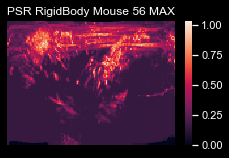

// -- Shape: (128, 91)-- Mean: 0.041077188817893864--[::]


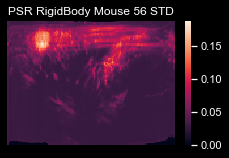

// -- Shape: (128, 91)-- Mean: 0.060433089693555014--[::]


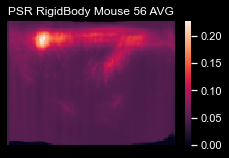

// -- Shape: (128, 91)-- Mean: 0.2437226713116127--[::]


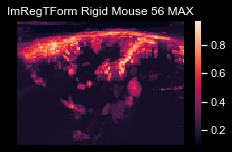

// -- Shape: (128, 91)-- Mean: 0.03606582855280052--[::]


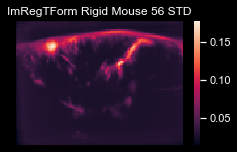

// -- Shape: (128, 91)-- Mean: 0.05673887415407888--[::]


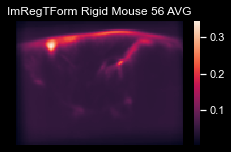

// -- Shape: (128, 91)-- Mean: 0.25466922847976253--[::]


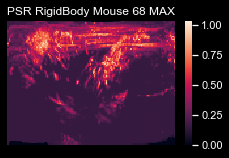

// -- Shape: (128, 91)-- Mean: 0.04107796601671225--[::]


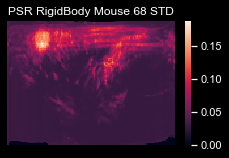

// -- Shape: (128, 91)-- Mean: 0.060429625470397735--[::]


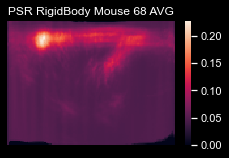

// -- Shape: (128, 91)-- Mean: 0.2437226713116127--[::]


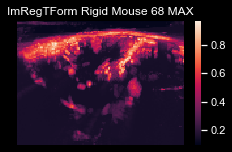

// -- Shape: (128, 91)-- Mean: 0.03606582855280052--[::]


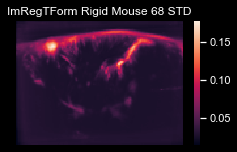

// -- Shape: (128, 91)-- Mean: 0.05673887415407888--[::]


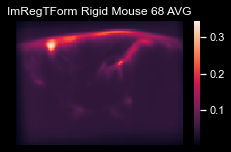

// -- Shape: (128, 91)-- Mean: 0.25467972268649774--[::]


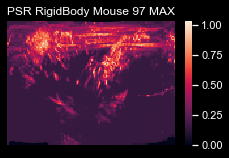

// -- Shape: (128, 91)-- Mean: 0.04108868565552243--[::]


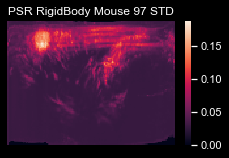

// -- Shape: (128, 91)-- Mean: 0.06043191535029201--[::]


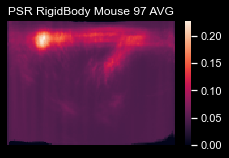

// -- Shape: (128, 91)-- Mean: 0.2437226713116127--[::]


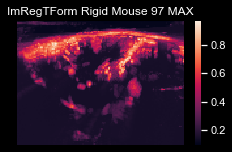

// -- Shape: (128, 91)-- Mean: 0.03606582855280052--[::]


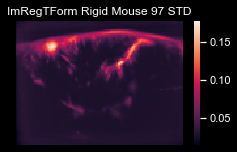

// -- Shape: (128, 91)-- Mean: 0.05673887415407888--[::]


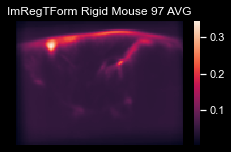

In [219]:

sizer= 0.25
frame= 0
print(irtfSim_avg56_RB.shape)
print(irtfSim_avg68_RB.shape)
print(irtfSim_avg97_RB.shape)

# print("[:+:]---------------------------Mouse 56-----------------------------[:+:]")
displayHeatmap(max_psr_avg56_RB, sizer, title= "PSR RigidBody Mouse 56 MAX")
displayHeatmap(std_psr_avg56_RB, sizer, title= "PSR RigidBody Mouse 56 STD")
displayHeatmap(mean_psr_avg56_RB, sizer, title= "PSR RigidBody Mouse 56 AVG")

displayHeatmap(max_irtfSim_avg56_RB, sizer, title= "ImRegTForm Rigid Mouse 56 MAX")
displayHeatmap(std_irtfSim_avg56_RB, sizer, title= "ImRegTForm Rigid Mouse 56 STD")
displayHeatmap(mean_irtfSim_avg56_RB, sizer, title=  "ImRegTForm Rigid Mouse 56 AVG")

# # displayHeatmap(max_nc_avg56_RB, sizer, title= "NormCorre pwrRigid Mouse 56 MAX")
# # displayHeatmap(mean_nc_avg56_RB, sizer, title= "NormCorre pwrRigid Mouse 56 AVG")
# # displayHeatmap(std_nc_avg56_RB, sizer, title= "NormCorre pwrRigid Mouse 56 STD")

# print("[:+:]---------------------Mouse 68-PSR RigidBody----------------------[:+:]")
displayHeatmap(max_psr_avg68_RB, sizer, title= "PSR RigidBody Mouse 68 MAX")
displayHeatmap(std_psr_avg68_RB, sizer, title= "PSR RigidBody Mouse 68 STD")
displayHeatmap(mean_psr_avg68_RB, sizer, title= "PSR RigidBody Mouse 68 AVG")

displayHeatmap(max_irtfSim_avg56_RB, sizer, title= "ImRegTForm Rigid Mouse 68 MAX")
displayHeatmap(std_irtfSim_avg56_RB, sizer, title= "ImRegTForm Rigid Mouse 68 STD")
displayHeatmap(mean_irtfSim_avg56_RB, sizer, title= "ImRegTForm Rigid Mouse 68 AVG")
# print("[:+:]---------------------Mouse 97-PSR RigidBody----------------------[:+:]")
displayHeatmap(max_psr_avg97_RB, sizer, title= "PSR RigidBody Mouse 97 MAX")
displayHeatmap(std_psr_avg97_RB, sizer, title= "PSR RigidBody Mouse 97 STD")
displayHeatmap(mean_psr_avg97_RB, sizer, title= "PSR RigidBody Mouse 97 AVG")

displayHeatmap(max_irtfSim_avg56_RB, sizer, title= "ImRegTForm Rigid Mouse 97 MAX")
displayHeatmap(std_irtfSim_avg56_RB, sizer, title= "ImRegTForm Rigid Mouse 97 STD")
displayHeatmap(mean_irtfSim_avg56_RB, sizer, title= "ImRegTForm Rigid Mouse 97 AVG")


### __[+]__ Affine  Heatmap

In [ ]:
sb.set_theme(style="dark", palette=None, font= 'roboto mono')
plt.style.use("dark_background")
sizer= .7

# plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
# plt.title('Distances: Unregistered-->refAvg')
# sb.lineplot(x=np.arange(vLen9840), y=unaligned_DM[0], color= 'cyan', label= 'Euclidian')
# sb.lineplot(x=np.arange(vLen9840), y=unaligned_DM[1]*100, color= 'magenta', label= 'Dicex10')
# plt.legend()
# plt.show()
plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_unreg )
plt.title('Affine StdDev: Unaligned | Avg: ' + str(np.mean(std_unreg)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avg56_AF )
plt.title('Affine StdDev: Registered to Reference Average | Avg: ' + str(np.mean(std_psr_avg56_AF)))
plt.show()

### __[+]__ Scale + Rotation  Heatmap

In [ ]:
sb.set_theme(style="dark", palette=None, font= 'roboto mono')
plt.style.use("dark_background")
sizer= .7

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_unreg )
plt.title('Scale + Rotation StdDev: Unaligned | Avg: ' + str(np.mean(std_unreg)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avg56_SR )
plt.title('Scale + Rotation StdDev: Registered to Reference Average | Avg: ' + str(np.mean(std_psr_avg56_SR)))
plt.show()

### __[+]__ Bilinear  Heatmap

In [ ]:
sb.set_theme(style="dark", palette=None, font= 'roboto mono')
plt.style.use("dark_background")
sizer= .7

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_unreg )
plt.title('Bilinear StdDev: Unaligned | Avg: ' + str(np.mean(std_unreg)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avg56_BL )
plt.title('Bilinear StdDev: Registered to Reference Average | Avg: ' + str(np.mean(std_psr_avg56_BL)))
plt.show()

### __[::]__ Deform  Heatmap

[:+:]---------------------------Mouse 56-----------------------------[:+:]
// -- Shape: (128, 91)-- Mean: 0.2835802510007271--[::]


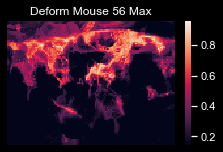

// -- Shape: (128, 91)-- Mean: 0.0366766550801426--[::]


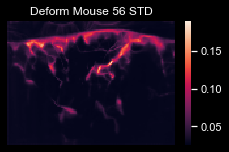

// -- Shape: (128, 91)-- Mean: 0.06403960872160987--[::]


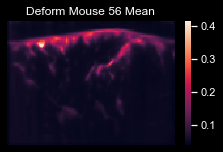

[:+:]---------------------------Mouse 68-----------------------------[:+:]
// -- Shape: (128, 91)-- Mean: 0.2907459074595342--[::]


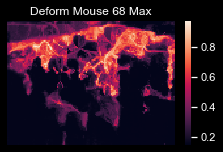

// -- Shape: (128, 91)-- Mean: 0.03798747214644384--[::]


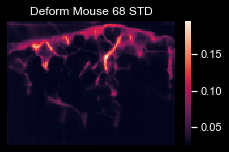

// -- Shape: (128, 91)-- Mean: 0.06408626026138757--[::]


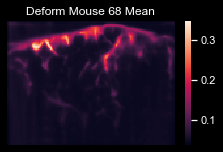

[:+:]---------------------------Mouse 97-----------------------------[:+:]
// -- Shape: (128, 91)-- Mean: 0.2793833764534299--[::]


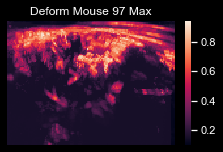

// -- Shape: (128, 91)-- Mean: 0.03626412519043178--[::]


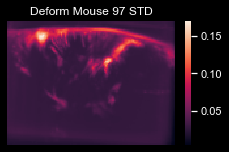

// -- Shape: (128, 91)-- Mean: 0.055550351158940844--[::]


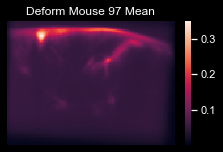

In [58]:
sizer= 0.25
frame= 0
print("[:+:]---------------------------Mouse 56-----------------------------[:+:]")
displayHeatmap(max_deform_avg56, sizer, title= "Deform Mouse 56 Max")
displayHeatmap(std_deform_avg56, sizer, title= "Deform Mouse 56 STD")
displayHeatmap(mean_deform_avg56, sizer, title= "Deform Mouse 56 Mean")
print("[:+:]---------------------------Mouse 68-----------------------------[:+:]")
displayHeatmap(max_deform_avg68, sizer, title= "Deform Mouse 68 Max")
displayHeatmap(std_deform_avg68, sizer, title= "Deform Mouse 68 STD")
displayHeatmap(mean_deform_avg68, sizer, title= "Deform Mouse 68 Mean")
print("[:+:]---------------------------Mouse 97-----------------------------[:+:]")
displayHeatmap(max_deform_avg97, sizer, title= "Deform Mouse 97 Max")
displayHeatmap(std_deform_avg97, sizer, title= "Deform Mouse 97 STD")
displayHeatmap(mean_deform_avg97, sizer, title= "Deform Mouse 97 Mean")

### [+] -- Optical Flow - ILK   Heatmap

[:+:]-------------------------------Mouse56------------------------------------------------[:+:]
// -- Shape: (128, 91)-- Mean: 0.6637225378641706--[::]


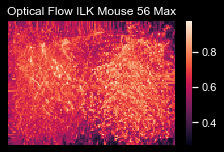

// -- Shape: (128, 91)-- Mean: 0.05192729157594586--[::]


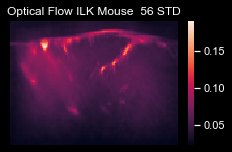

// -- Shape: (128, 91)-- Mean: 0.08161205641464139--[::]


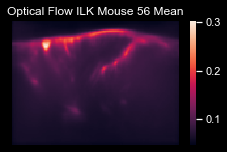

[:+:]------------------------------Mouse68-----------------------------------[:+:]
// -- Shape: (128, 91)-- Mean: 0.6212849547640471--[::]


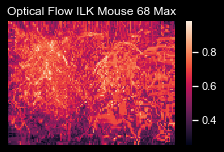

// -- Shape: (128, 91)-- Mean: 0.0463825352409409--[::]


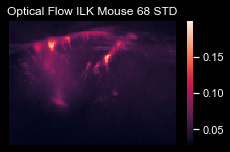

// -- Shape: (128, 91)-- Mean: 0.06294302812173681--[::]


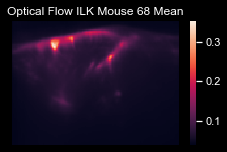

[:+:]------------------------------Mouse97-----------------------------------[:+:]
// -- Shape: (128, 91)-- Mean: 0.5828109092098418--[::]


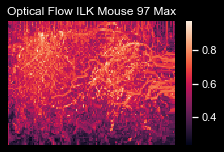

// -- Shape: (128, 91)-- Mean: 0.04260447889802032--[::]


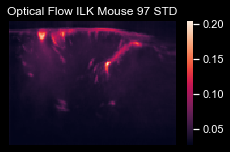

// -- Shape: (128, 91)-- Mean: 0.06543382875101501--[::]


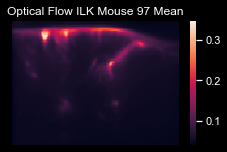

In [60]:
sizer= 0.25
frame= 0
print("[:+:]-------------------------------Mouse56------------------------------------------------[:+:]")
displayHeatmap(max_opFlow_ilk_avg56, sizer, title= "Optical Flow ILK Mouse 56 Max")
displayHeatmap(std_opFlow_ilk_avg56, sizer, title= "Optical Flow ILK Mouse  56 STD")
displayHeatmap(mean_opFlow_ilk_avg56, sizer, title= "Optical Flow ILK Mouse 56 Mean")

print("[:+:]------------------------------Mouse68-----------------------------------[:+:]")
displayHeatmap(max_opFlow_ilk_avg68, sizer, title= "Optical Flow ILK Mouse 68 Max")
displayHeatmap(std_opFlow_ilk_avg68, sizer, title= "Optical Flow ILK Mouse 68 STD")
displayHeatmap(mean_opFlow_ilk_avg68, sizer, title= "Optical Flow ILK Mouse 68 Mean")

print("[:+:]------------------------------Mouse97-----------------------------------[:+:]")
displayHeatmap(max_opFlow_ilk_avg97, sizer, title= "Optical Flow ILK Mouse 97 Max")
displayHeatmap(std_opFlow_ilk_avg97, sizer, title= "Optical Flow ILK Mouse 97 STD")
displayHeatmap(mean_opFlow_ilk_avg97, sizer, title= "Optical Flow ILK Mouse 97 Mean")

# print("[:+:]-------------------------------------------------------------------------------[:+:]")
# displayHeatmap(opFlow_tvl1_avg56[ :, :, frame], sizer, title= "opflow tvl1 56 ["+ str(frame)+"]")
# displayHeatmap(opFlow_ilk_avg56[ :, :, frame], sizer, title= "opflow ilk 56 ["+ str(frame)+"]")

# print("[:+:]-------------------------------------------------------------------------------[:+:]")
# displayHeatmap(opFlow_tvl1_avg68[ :, :, frame], sizer, title= "opflow tvl1 68 ["+ str(frame)+"]")
# displayHeatmap(opFlow_ilk_avg68[ :, :, frame], sizer, title= "opflow ilk 68 ["+ str(frame)+"]")

# print("[:+:]-------------------------------------------------------------------------------[:+:]")
# displayHeatmap(opFlow_tvl1_avg97[ :, :, frame], sizer, title= "opflow tvl1 97 ["+ str(frame)+"]")
# displayHeatmap(opFlow_ilk_avg97[ :, :, frame], sizer, title= "opflow ilk 97 ["+ str(frame)+"]")



### [+] -- Optical Flow - TVL1  Heatmap

In [ ]:
sizer= 0.25
frame= 0

print("[:+:]----------------------------------Mouse56--------------------------------------------[:+:]")
displayHeatmap(max_opFlow_tvl1_avg56, sizer, title= "Optical Flow tvl1 Mouse 56 Max")
displayHeatmap(std_opFlow_tvl1_avg56, sizer, title= "Optical Flow tvl1 Mouse  56 STD")
displayHeatmap(mean_opFlow_tvl1_avg56, sizer, title= "Optical Flow tvl1 Mouse 56 Mean")

print("[:+:]---------------------------------Mouse68-------------------------------[:+:]")
displayHeatmap(max_opFlow_tvl1_avg68, sizer, title= "Optical Flow tvl1 Mouse 68 Max")
displayHeatmap(std_opFlow_tvl1_avg68, sizer, title= "Optical Flow tvl1 Mouse 68 STD")
displayHeatmap(mean_opFlow_tvl1_avg68, sizer, title= "Optical Flow tvl1 Mouse 68 Mean")

print("[:+:]---------------------------------Mouse97-------------------------------[:+:]")
displayHeatmap(max_opFlow_tvl1_avg97, sizer, title= "Optical Flow tvl1 Mouse 97 Max")
displayHeatmap(std_opFlow_tvl1_avg97, sizer, title= "Optical Flow tvl1 Mouse 97 STD")
displayHeatmap(mean_opFlow_tvl1_avg97, sizer, title= "Optical Flow tvl1 Mouse 97 Mean")

### [+] -- Optical Flow + Deform  Heatmap

In [ ]:
# displayHeatmap(opForm_ilk_avg56[ :, :, 0], sizer= 0.25, title= "opForm ilk 56")
# displayHeatmap(opForm_ilk_avg68[ :, :, 0], sizer= 0.25, title= "opForm ilk 68")
# displayHeatmap(opForm_ilk_avg97[ :, :, 0], sizer= 0.25, title= "opForm ilk 97")
# displayHeatmap(opForm_tvl1_avg56[ :, :, 0], sizer= 0.25, title= "opForm tvl1 56")
# displayHeatmap(opForm_tvl1_avg68[ :, :, 0], sizer= 0.25, title= "opForm tvl1 68")
# displayHeatmap(opForm_tvl1_avg97[ :, :, 0], sizer= 0.25, title= "opForm tvl1 97")

print("[:+:]---------------------------Mouse 56-----------------------------[:+:]")
displayHeatmap(max_opForm_ilk_avg56, sizer, title= "PSR RigidBody Mouse 56 MAX")
displayHeatmap(std_opForm_ilk_avg56, sizer, title= "PSR RigidBody Mouse 56 STD")
displayHeatmap(mean_opForm_ilk_avg56, sizer, title= "PSR RigidBody Mouse 56 AVG")

displayHeatmap(max_opForm_tvl1_avg56, sizer, title= "ImRegTForm Rigid Mouse 56 MAX")
displayHeatmap(std_opForm_tvl1_avg56, sizer, title= "ImRegTForm Rigid Mouse 56 STD")
displayHeatmap(mean_opForm_tvl1_avg56, sizer, title= "ImRegTForm Rigid Mouse 56 AVG")

print("[:+:]---------------------Mouse 68-PSR RigidBody----------------------[:+:]")
displayHeatmap(max_opForm_avg68, sizer, title= "PSR RigidBody Mouse 68 MAX")
displayHeatmap(std_opForm_avg68, sizer, title= "PSR RigidBody Mouse 68 STD")
displayHeatmap(mean_opForm_avg68, sizer, title= "PSR RigidBody Mouse 68 AVG")

displayHeatmap(max_opForm_ilk_avg68, sizer, title= "ImRegTForm Rigid Mouse 68 MAX")
displayHeatmap(std_opForm_ilk_avg68, sizer, title= "ImRegTForm Rigid Mouse 68 STD")
displayHeatmap(mean_opForm_ilk_avg68, sizer, title= "ImRegTForm Rigid Mouse 68 AVG")
print("[:+:]---------------------Mouse 97-PSR RigidBody----------------------[:+:]")
displayHeatmap(max_opForm_tvl1_ilk_avg97, sizer, title= "PSR RigidBody Mouse 97 MAX")
displayHeatmap(std_opForm_tvl1_ilk_avg97, sizer, title= "PSR RigidBody Mouse 97 STD")
displayHeatmap(mean_opForm_tvl1_ilk_avg97, sizer, title= "PSR RigidBody Mouse 97 AVG")

displayHeatmap(max_opForm_tvl1_avg97, sizer, title= "ImRegTForm Rigid Mouse 97 MAX")
displayHeatmap(std_opForm_tvl1_avg97, sizer, title= "ImRegTForm Rigid Mouse 97 STD")
displayHeatmap(mean_opForm_tvl1_avg97, sizer, title= "ImRegTForm Rigid Mouse 97 AVG")


## [::] -- Bar Plot Comparison

In [226]:
for val in diceTionary.keys():
    print(val)

unreg_x9840_ref56
unreg_x9840_ref68
unreg_x9840_ref97
psr_ref56_RB
psr_ref56_AF
psr_ref56_SR
psr_ref56_BL
deform56
opFlow_ilk_ref56
opFlow_tvl1_ref56
psr_ref68_RB
psr_ref68_AF
psr_ref68_SR
psr_ref68_BL
deform68
opFlow_ilk_ref68
opFlow_tvl1_ref68
psr_ref97_RB
psr_ref97_AF
psr_ref97_SR
psr_ref97_BL
deform97
opFlow_ilk_ref97
opFlow_tvl1_ref97
irtfSim_ref56_RB
irtfSim_ref68_RB
irtfSim_ref97_RB
opForm_ilk_ref56
opForm_tvl1_ref56
opForm_ilk_ref68
opForm_tvl1_ref68
opForm_ilk_ref97
opForm_tvl1_ref97


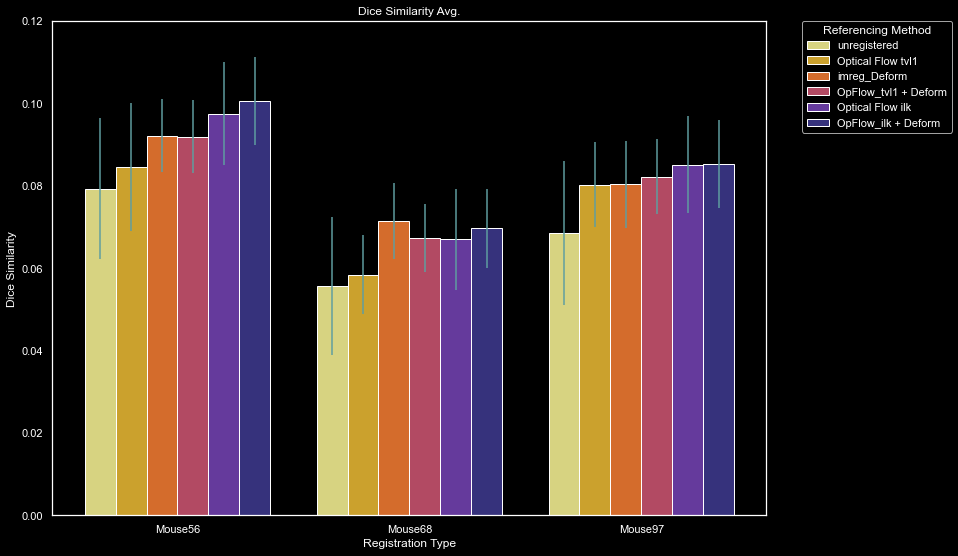

In [234]:
sizer= 1
plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
diceSims= np.asarray([
            diceTionary['unreg_x9840_ref56'],
            # diceTionary['psr_ref56_BL'], 
            # diceTionary['psr_ref56_AF'],
            # diceTionary['psr_ref56_SR'],
            # diceTionary['psr_ref56_RB'],
            # diceTionary['irtfSim_ref56_RB'],
            diceTionary['opFlow_tvl1_ref56'],
            diceTionary['deform56'],
            diceTionary['opForm_tvl1_ref56'],
            diceTionary['opFlow_ilk_ref56'],
            diceTionary['opForm_ilk_ref56'],

            diceTionary['unreg_x9840_ref68'],
            # diceTionary['psr_ref68_BL'], 
            # diceTionary['psr_ref68_AF'],
            # diceTionary['psr_ref68_SR'],
            # diceTionary['psr_ref68_RB'],
            # diceTionary['irtfSim_ref68_RB'],
            diceTionary['opFlow_tvl1_ref68'],
            diceTionary['deform68'],
            diceTionary['opForm_tvl1_ref68'],
            diceTionary['opFlow_ilk_ref68'],
            diceTionary['opForm_ilk_ref68'],
            

            diceTionary['unreg_x9840_ref97'],
            # diceTionary['psr_ref97_BL'], 
            # diceTionary['psr_ref97_AF'],
            # diceTionary['psr_ref97_SR'],
            # diceTionary['psr_ref97_RB'],
            # diceTionary['irtfSim_ref97_RB'],
            diceTionary['opFlow_tvl1_ref97'],
            diceTionary['deform97'],
            diceTionary['opForm_tvl1_ref97'],
            diceTionary['opFlow_ilk_ref97'],
            diceTionary['opForm_ilk_ref97'],
            
])

#[+]-- Each ref method has its own array of dice similarities
    #-- By default, the errorbars will be the standard deviations of that bar grouping, not the stdDev of the array of similarities,
    #-- However, I have created made it such that the errorbars represent the std of the array of dice sims
diceMeans= np.empty(0)
diceErr= np.empty(0)
for i in diceSims:
    diceMeans= np.append(diceMeans, np.mean(i))
    diceErr= np.append(diceErr, np.std(i))
groupSize= 6
groupCnt= diceSims.shape[0]//groupSize
 
diceFrame = pd.DataFrame({
        'barCluster': np.concatenate((['Mouse56']*groupSize, ['Mouse68']*groupSize, ['Mouse97']*groupSize)),
        # 'clrCategory': ['unregistered', 'pystackReg BL', 'pystackReg AF', 'pystackReg SR', 'pystackReg RB','imreg_similarty', 'Optical Flow tvl1', 'imreg_Deform', 'Optical Flow ilk','OpFlow_ilk + Deform' ,'OpFlow_tvl1 + Deform']*groupCnt,
        'clrCategory': ['unregistered', 'Optical Flow tvl1','imreg_Deform','OpFlow_tvl1 + Deform' , 'Optical Flow ilk','OpFlow_ilk + Deform' ]*groupCnt,
        'DiceSim': diceMeans,
        'Error' : diceErr
})


barPlot= sb.barplot(
           x='barCluster', 
           y=diceMeans, 
        #    yerr= diceErr,
           hue='clrCategory', 
           data= diceFrame, 
        #    palette= 'Spectral',
           palette='CMRmap_r',
#            errorbar= 'sd',
#            errcolor= 'cyan'
)

barPlot.set(xlabel='Registration Type',ylabel='Dice Similarity', title='Dice Similarity Avg.')
x_coords = [p.get_x() + 0.5 * p.get_width() for p in barPlot.patches]
y_coords = [p.get_height() for p in barPlot.patches]
barPlot.errorbar(x=x_coords, y=y_coords, yerr=diceFrame["Error"], fmt="none", c="cadetblue")
plt.ylim(0, .12) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= 'Referencing Method')
plt.show()

In [29]:
sizer= 1
unreg_x9840_ref56_DM= distanceMatrix(unreg_x9840, mean_ref56, endex= vLen9840, begindex= 0)
unreg_x9840_ref68_DM= distanceMatrix(unreg_x9840, mean_ref68, endex= vLen9840, begindex= 0)
unreg_x9840_ref97_DM= distanceMatrix(unreg_x9840, mean_ref97, endex= vLen9840, begindex= 0)
deform97_DM = distanceMatrix(deform_avg97, mean_ref97, endex= vLen9840, begindex= 0)
opFlow_ilk_ref97_DM = distanceMatrix(opFlow_ilk_avg97, mean_ref97, endex=vLen9840, begindex= 0)
opFlow_tvl1_ref97_DM = distanceMatrix(opFlow_tvl1_avg97, mean_ref97, endex=vLen9840, begindex= 0)
irtfSim_ref56_RB_DM = distanceMatrix(irtfSim_avg56_RB, mean_ref56, endex=vLen9840, begindex= 0)
irtfSim_ref68_RB_DM = distanceMatrix(irtfSim_avg68_RB, mean_ref68, endex=vLen9840, begindex= 0)
irtfSim_ref97_RB_DM = distanceMatrix(irtfSim_avg97_RB, mean_ref97, endex=vLen9840, begindex= 0)
opForm_ilk_ref56_DM = distanceMatrix(opFlow_ilk_avg56, mean_ref56, endex=vLen9840, begindex= 0)
opForm_tvl1_ref56_DM = distanceMatrix(opFlow_tvl1_avg56, mean_ref56, endex=vLen9840, begindex= 0)
opForm_ilk_ref68_DM = distanceMatrix(opFlow_ilk_avg68, mean_ref68, endex=vLen9840, begindex= 0)
opForm_tvl1_ref68_DM = distanceMatrix(opFlow_tvl1_avg68, mean_ref68, endex=vLen9840, begindex= 0)
opForm_ilk_ref97_DM = distanceMatrix(opFlow_ilk_avg97, mean_ref97, endex=vLen9840, begindex= 0)
opForm_tvl1_ref97_DM = distanceMatrix(opFlow_tvl1_avg97, mean_ref97, endex=vLen9840, begindex= 0)

In [30]:
sizer= 1


plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
diceSims= np.asarray([

            opFlow_tvl1_ref56_DM,
            deform56_DM,
            opFlow_ilk_ref56_DM,
            opForm_ilk_ref56_DM,
            opForm_tvl1_ref56_DM,
            unreg_x9840_ref56_DM, 

            opFlow_tvl1_ref68_DM,
            deform68_DM,
            opFlow_ilk_ref68_DM,
            opForm_ilk_ref68_DM,
            opForm_tvl1_ref68_DM,
            unreg_x9840_ref68_DM,

            opFlow_tvl1_ref97_DM,
            deform97_DM,
            opFlow_ilk_ref97_DM,
            opForm_ilk_ref97_DM,
            opForm_tvl1_ref97_DM,
            unreg_x9840_ref97_DM,
        ])

#[+]-- Each ref method has its own array of dice similarities
    #-- By default, the errorbars will be the standard deviations of that bar grouping, not the stdDev of the array of similarities,
    #-- However, I have created made it such that the errorbars represent the std of the array of dice sims
diceMeans= np.empty(0)
diceErr= np.empty(0)
for i in diceSims:
    diceMeans= np.append(diceMeans, np.mean(i))
    diceErr= np.append(diceErr, np.std(i))
groupSize= 6
groupCnt= diceSims.shape[0]//groupSize
 
diceFrame = pd.DataFrame({
        'barCluster': np.concatenate((['Mouse56']*groupSize, ['Mouse68']*groupSize, ['Mouse97']*groupSize)),
        'clrCategory': ['pystackReg BL', 'pystackReg AF', 'pystackReg SR', 'pystackReg RB', 'Optical Flow tvl1', 'imreg_Deform', 'Optical Flow ilk']*groupCnt,
        'DiceSim': diceMeans,
        'Error' : diceErr
})


barPlot= sb.barplot(
           x='barCluster', 
           y=diceMeans, 
        #    yerr= diceErr,
           hue='clrCategory', 
           data= diceFrame, 
        #    palette= 'Spectral',
           palette='CMRmap_r',
#            errorbar= 'sd',
#            errcolor= 'cyan'
)


barPlot.set(xlabel='Registration Type',ylabel='Dice Similarity', title='Dice Similarity Avg.')
x_coords = [p.get_x() + 0.5 * p.get_width() for p in barPlot.patches]
y_coords = [p.get_height() for p in barPlot.patches]
barPlot.errorbar(x=x_coords, y=y_coords, yerr=diceFrame["Error"], fmt="none", c="cadetblue")
plt.ylim(0, .12) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= 'Referencing Method')
plt.show()

NameError: name 'opFlow_tvl1_ref56_DM' is not defined

<Figure size 921.6x655.2 with 0 Axes>

## __[:::]__ ToDo

##### __[:+:]__--- Pre-processing ---
 - [+] Fix tiff files, they seem to be only 91x3600 instead of 91x128x3600
 - [+] Convert one ref MAT into TIFF
 - [+] Convert all 82 MATs into TIFFs
 - [+] Split single tiff file (sample) into first 100-300 frames
 - [+] Split whole data set into first 100-300 frames
 - [+] Change reference and substack to 180-300 frames
 - [+] save unaligned tiff 
##### __[::]__-- Alignment Algos (120-300) ---
 - [+] Pystackreg Align with reference avg
 - [+] Pystackreg ALign with moving window size 60
 - [+] Pystackreg ALign with total Average
 - [+] PSR previous frame
 - [+] PSR first frame
 - [+] Moving windows of multiple sizes
 - [+] Affine type registration
 - [+] Scaled Rotation type registration
 - [+] Bilinear type registration
 - [-] Combined Algos
 - [+] ch^2 shift registration
 - [+] Data for imregDeform Registration
 - [ ] cross-correlation shift
 - [+] scikit-image registration
    - [+] optical_flow_ilk
    - [+] optical_flow_tvl1
    - [-] phase_cross_correlation
    - [ ] Mouse 68 weirdness


##### __[::]__-- Heuristics Functions ---
 - [x] Euclidian distance 
 - [x] Standard deviation
 - [x] Dice distance
 - [x] Min & Max
 - [-] Chi^2
 
 ##### __[::]__-- Data Viz ---
 - [+] Rigid Body Registration
 - [+] Animate pystackreg registered
 - [+] Affine type registration
 - [+] Scaled Rotation type registration
 - [+] Bilinear type registration
 - [-] DFT 
 - [ ] Reorganize: Add reference mouse, and omit other referencing methods
 - [ ] Error Bars

##### -[::]--- Misc ---
 - [+] Make Repo
 - [+] Form Functions
 - [+] Fix tensorInfo fx
 - [+] Bar Graphs
 - [ ] Better Animations
 - [+] Compare single images across different mice, and find the differences
 - [+] Create DataFrame for plotting
 - [+] References: #56, 68, 97
 - [ ] cPCA  analysis
 - [ ] Study Referencing Methods
 - [ ] Slides

# Stuff that takes a long-ass time: 

In: C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_rigid\Afterregis_181300_similarity_ref56.mat
    Afterregis_181300_similarity_ref56.mat---> Afterregis_181300_similarity_ref56x180_300.tiff
Out: Afterregis_181300_similarity_ref56x180_300.tiff
Path: : C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref56x180_300.tiff
(128, 91, 9840)
(128, 91, 9840)
(128, 91, 9840)
// -- Shape: (128, 91)-- Mean: 0.04747362525086913--[::]


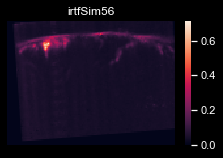

// -- Shape: (128, 91)-- Mean: 0.04657277635420682--[::]


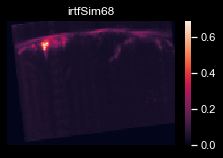

// -- Shape: (128, 91)-- Mean: 0.04551063975678602--[::]


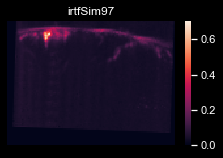

In [58]:
irtfSim56_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_rigid\Afterregis_181300_similarity_ref56.mat")
# # irtfSim68_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_rigid\Afterregis_181300_similarity_ref68.mat")
# # irtfSim97_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_rigid\Afterregis_181300_similarity_ref97.mat")
tmp_mat= loadmat(irtfSim56_File)['Afterregis']


# # mat73totiff(matFile= irtfSim97_File, outPath= reg_Path, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")
mattotiff(matFile= irtfSim56_File, outPath= reg_Path, enDex= vLen9840, showTensorInfo= True, addendum= "x180_300")
# # mat73totiff(matFile= irtfSim68_File, outPath= reg_Path, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")


# irtfSim_avg56_RB= np.transpose(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref56x180_300.tiff"), (1,2,0))
irtfSim_avg56_RB= (io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref56x180_300.tiff"))
print(irtfSim_avg56_RB.shape)
irtfSim_avg68_RB= np.transpose(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref68x180_300.tiff"), (1,2,0))
print(irtfSim_avg68_RB.shape)
irtfSim_avg97_RB= np.transpose(io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\Afterregis_181300_similarity_ref97x180_300.tiff"), (1,2,0))
print(irtfSim_avg97_RB.shape)

displayHeatmap(irtfSim_avg56_RB[ :, :, 1], sizer= 0.25, title= "irtfSim56")
displayHeatmap(irtfSim_avg68_RB[ :, :, 1], sizer= 0.25, title= "irtfSim68")
displayHeatmap(irtfSim_avg97_RB[ :, :, 1], sizer= 0.25, title= "irtfSim97")
# displayHeatmap(unreg_x9840[ :, :, 1], sizer= 0.25, title= "unreg68")
# displayHeatmap(unreg_x9840[ :, :, 1], sizer= 0.25, title= "unreg97")
# displayHeatmap(unreg_x9840[ :, :, 1], sizer= 0.25, title= "unreg56")
